In [1]:
from rdkit.Chem import rdChemReactions
from rdkit import Chem
import pandas as pd
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rxnmapper import RXNMapper
from transformers import logging
from rxnutils.chem.reaction import ChemicalReaction
logging.set_verbosity_error()  # Only log errors
rxnmapper = RXNMapper()

In [3]:
results = pd.read_csv('../../../data/all_results.csv')
results.head()

,canonical_rxn,target,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
0,CC(C)(C)OC(=O)CCC(CCC(=O)OC(C)(C)C)(CCC(=O)OC(...,CC(C)(C)OC(=O)CCC(CCC(=O)OC(C)(C)C)(CCC(=O)OC(...,NC(CCC(=O)O)(CCC(=O)O)CCC(=O)NC(CCC(=O)NC(CCC(...,NC(CCC(=O)O)(CCC(=O)O)CCC(=O)NC(CCC(=O)O)(CCC(...,NC(CCC(=O)NC(CCC(=O)O)(CCC(=O)O)CCC(=O)O)(CCC(...,O=C(O)CCC(N)(CCC(=O)O)CCC(=O)NC(CCC(=O)NC(CCC(...,NC(CCC(=O)NC(CCC(=O)O)(CCC(=O)NC(CCC(=O)O)(CCC...,O=C(O)CCC(N)(CCC(=O)NC(CCC(=O)NC(CCC(=O)O)(CCC...,NC(CCC(=O)O)(CCC(=O)NC(CCC(=O)O)(CCC(=O)O)CCC(...,NC(CCC(=O)O)(CCC(=O)NC(CCC(=O)NC(CCC(=O)O)(CCC...,NC(CCC(=O)NC(CCC(=O)O)(CCC(=O)O)CCC(=O)NC(CCC(...,NC(CCC(=O)O)(CCC(=O)O)CCC(=O)O
1,CC(C)(C)OC(=O)CCC(CCC(=O)OC(C)(C)C)(CCC(=O)OC(...,CC(C)(C)OC(=O)CCC(CCC(=O)OC(C)(C)C)(CCC(=O)OC(...,NC(CCC(=O)O)(CCC(=O)O)CCC(=O)NC(CCC(=O)NC(CCC(...,NC(CCC(=O)NC(CCC(=O)O)(CCC(=O)O)CCC(=O)O)(CCC(...,NC(CCC(=O)O)(CCC(=O)O)CCC(=O)NC(CCC(=O)O)(CCC(...,NC(CCC(=O)NC(CCC(=O)O)(CCC(=O)NC(CCC(=O)O)(CCC...,O=C(O)CCC(N)(CCC(=O)O)CCC(=O)NC(CCC(=O)NC(CCC(...,NC(CCC(=O)O)(CCC(=O)NC(CCC(=O)NC(CCC(=O)O)(CCC...,O=C(O)CCC(N)(CCC(=O)NC(CCC(=O)NC(CCC(=O)O)(CCC...,NC(CCC(=O)O)(CCC(=O)NC(CCC(=O)O)(CCC(=O)O)CCC(...,NC(CCC(=O)NC(CCC(=O)O)(CCC(=O)O)CCC(=O)O)CCC(=...,O=C(O)CCC(N)(CCC(=O)NC(CCC(=O)NC(CCC(=O)O)(CCC...
2,CC(C)(C)OC(=O)CCC(CCC(=O)OC(C)(C)C)(CCC(=O)OC(...,CC(C)(C)OC(=O)CCC(CCC(=O)OC(C)(C)C)(CCC(=O)OC(...,NC(CCC(=O)O)(CCC(=O)O)CCC(=O)NC(CCC(=O)NC(CCC(...,NC(CCC(=O)O)(CCC(=O)O)CCC(=O)NC(CCC(=O)O)(CCC(...,NC(CCC(=O)NC(CCC(=O)O)(CCC(=O)O)CCC(=O)O)(CCC(...,NC(CCC(=O)NC(CCC(=O)O)(CCC(=O)NC(CCC(=O)O)(CCC...,NC(CCC(=O)O)(CCC(=O)NC(CCC(=O)O)(CCC(=O)O)CCC(...,O=C(O)CCC(N)(CCC(=O)O)CCC(=O)NC(CCC(=O)NC(CCC(...,NC(CCC(=O)O)(CCC(=O)NC(CCC(=O)NC(CCC(=O)O)(CCC...,NC(CCC(=O)NC(CCC(=O)O)(CCC(=O)O)CCC(=O)O)CCC(=...,NC(CCC(=O)NC(CCC(=O)O)(CCC(=O)O)CCC(=O)NC(CCC(...,NC(CCC(=O)O)(CCC(=O)O)CCC(=O)O
3,CCC[N+](CCC)(CCC)CCC.CC[Si](CC)(CC)O[C@H]1C[C@...,CC[Si](CC)(CC)O[C@H]1C[C@H]2OC[C@@]2(OC(C)=O)[...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)...
4,CN(C)C=O.Cc1ccc(S(=O)(=O)OC[C@H]2O[C@@H]3O[C@H...,[N-]=[N+]=NC[C@H]1O[C@@H]2O[C@H]3[C@H](O)[C@@H...,[N-]=[N+]=NC[C@H]1O[C@@H]2O[C@@H](CO)[C@@H](O)...,[N-]=[N+]=NC[C@H]1O[C@@H]2O[C@@H]1[C@H](O)[C@@...,[N-]=[N+]=NC[C@H]1O[C@@H]2O[C@@H]1[C@@H](O)[C@...,[N-]=[N+]=NC[C@H]1O[C@@H]2O[C@H]1[C@@H](O)[C@@...,[N-]=[N+]=NC[C@H]1O[C@@H]2O[C@@H]1C(O)[C@@H](O...,[N-]=[N+]=NC[C@H]1O[C@@H]2O[C@H]1[C@@H](O)[C@@...,[N-]=[N+]=NC[C@H]1O[C@@H]2O[C@@H]1[C@H](O)[C@@...,[N-]=[N+]=NC[C@H]1O[C@@H]2O[C@H]1CO,[N-]=[N+]=NC[C@H]1O[C@@H]2O[C@@H]1CO,NC[C@H]1O[C@@H]2O[C@H]1CO


In [10]:
top_n_accuracy(results, 5)

0.285

In [2]:
choriso = pd.read_csv('../../../data/processed_choriso_preds_mapped.tsv', sep='\t')

choriso.head()

,rxn,prods,rxnclass,top-1,top-2,top-3,top-4,top-5,top-1 acc,top-2 acc,top-3 acc,top-4 acc,top-5 acc,rxnclass_1,regio,mapped
0,CN(C)C=O.COc1ccc2cc(OS(=O)(=O)C(F)(F)F)c(Cc3cc...,COc1ccc2cc(-c3cccnc3)c(Cc3ccccc3)cc2c1,3.1.4,COc1ccc2cc(-c3cccnc3)c(Cc3ccccc3)cc2c1,COc1ccc2cc(-c3cccnc3)c(Cc3ccccc3)cc2c1,COc1ccc2cc(-c3cncnc3)c(Cc3ccccc3)cc2c1,COc1ccc2cc(-c3ccnc3)c(Cc3ccccc3)cc2c1,COc1ccc2cc(-c3cccnc3)c(Cc3ccccc3)cc2c1,True,True,False,False,True,3,False,CN(C)C=O.O=S(=O)(O[c:8]1[cH:7][c:6]2[cH:5][cH:...
1,CCOC(=O)/C=C/CC(F)(F)C(Cl)=N[C@@H](COC)c1ccccc...,CCOC(=O)CCCC(F)(F)C(Cl)=N[C@@H](COC)c1ccccc1,7.6.1,CCOC(=O)CCCC(F)(F)C(Cl)=N[C@@H](COC)c1ccccc1,CCOC(=O)CCCC(F)(F)C(I)=N[C@@H](COC)c1ccccc1,CCOC(=O)CCCC(F)(F)C(Cl)=N[C@@H](COC)c1ccccc1,CCOC(=O)CCCC(F)(F)C(Cl)=N[C@H](COC)c1ccccc1,CCOC(=O)CCCC(F)(F)C(Cl)=N[C@@H](COC)c1ccccc1,True,False,True,False,True,7,False,[CH3:1][CH2:2][O:3][C:4](=[O:5])/[CH:6]=[CH:7]...
2,CCCCOS(=O)(=O)CC[N+](C)(C)C.CN(C)C(=S)[S-].O>>...,CCCCSC(=S)N(C)C,1.8.31,CCCCSC(=S)N(C)C,Br.CCCCSC(=S)N(C)C,CCCCSC(=S)N(C)C.Cl,CCCCSC(=S)N(C)C,CCCCSCC(=S)N(C)C,True,False,False,True,False,1,True,C[N+](C)(C)CCS(=O)(=O)O[CH2:4][CH2:3][CH2:2][C...
3,CC(=O)OC/C=C\C(C)(C)O.Cc1ccc(S(=O)(=O)N=C=O)cc...,CC(=O)OC/C=C\C(C)(C)OC(=O)NS(=O)(=O)c1ccc(C)cc1,2.4.2,CC(=O)OCC=CC(C)(C)OC(=O)NS(=O)(=O)c1ccc(C)cc1,CC(=O)OCC1C=C(C)COC(=O)N1S(=O)(=O)c1ccc(C)cc1,CC(=O)OCC1C=C(C)CN1S(=O)(=O)c1ccc(C)cc1,CC(=O)OCC(CC(C)(C)O)NS(=O)(=O)c1ccc(C)cc1,CC(=O)OC[C@@H]1C=C(C)COC(=O)N1S(=O)(=O)c1ccc(C...,False,False,False,False,False,2,False,[CH3:1][C:2](=[O:3])[O:4][CH2:5]/[CH:6]=[CH:7]...
4,CO.COC(=O)CCC(CCC(=O)OC)NC(=O)OC(C)(C)C.[Na+]....,CC(C)(C)OC(=O)NC(CCC(=O)O)CCC(=O)O,6.2.2,CC(C)(C)OC(=O)NC(CCC(=O)O)CCC(=O)O,COC(=O)CCC(CCC(=O)O)NC(=O)OC(C)(C)C,CC(C)(C)OC(=O)NC(CCC(=O)O)CCC(=O)O,CC(C)(C)OC(=O)NC(CCCC(=O)O)CCC(=O)O,CC(C)(C)OC(=O)NC(CCC(=O)O)CCC(=O)O,True,False,True,False,True,6,False,CO.C[O:14][C:12]([CH2:11][CH2:10][CH:9]([NH:8]...


In [3]:
def aam_from_smiles(list_rxn_smiles):
    rxn_mapper = RXNMapper()
    out = []
    for i, rxn in enumerate(list_rxn_smiles):
        try:
            out.append(rxn_mapper.get_attention_guided_atom_maps([rxn])[0])
        except: 
            out.append({"confidence": "", "mapped_rxn": ""})
            print('Issue with reaction', i, rxn)
    return(out)


def template_smarts_from_mapped_smiles(
        mapped_smiles,
        radius=0,
        failed_template = False
):
    
    rxn = ChemicalReaction(mapped_smiles, clean_smiles = False)
    failed_templates = []
    try:
        rxn.generate_reaction_template(radius)
        return(rxn.canonical_template.smarts)
    except:
        if failed_template != False: 
            failed_templates.append(mapped_smiles)
    
    if failed_template != False:
        print("Problem generating the templates of the following reactions: \n", failed_templates)

    return("")



### Compare dummy reactions mappings

Example for Diels-Alder

In [31]:
diels = AllChem.ReactionFromSmarts('[CH2;D1;+0:1]=[C;H0;D3;+0:2](-[CH3;D1;+0:3])-[CH;D2;+0:4]=[CH2;D1;+0:5].[CH2;D1;+0:6]=[CH;D2;+0:7]>>[CH3;D1;+0:1]-[C;H0;D3;+0:2]1=[CH;D2;+0:4]-[CH2;D2;+0:5]-[CH2;D2;+0:6]-[CH;D3;+0:7]-[CH2;D2;+0:3]-1')

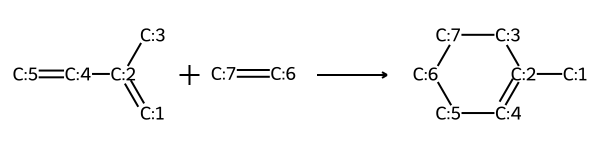

In [32]:
diels

Here we remove the additional data in the SMARTS (number of H atom and valence)

In [29]:
sm = '[C:1]=[C:2](-[C:3])-[C:4]=[C:5].[C:6]=[C:7]>>[C:1]-[C:2]1=[C:4]-[C:5]-[C:6]-[C:7]-[C:3]-1'
da2 = AllChem.ReactionFromSmarts(sm)

In [33]:
m1 = Chem.MolFromSmiles('CC(C=C)=C')
m2 = Chem.MolFromSmiles('C=CC=O')

print(f'With total mapping: {len(diels.RunReactants((m1,m2)))}')
print(f'Without total mapping (manual modification): {len(da2.RunReactants((m1,m2)))}')

With total mapping: 1
Without total mapping (manual modification): 2


Products from modified SMARTS are regioisomers.

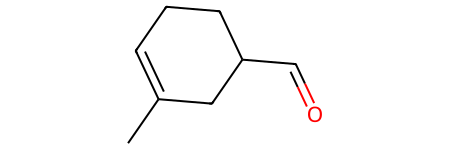

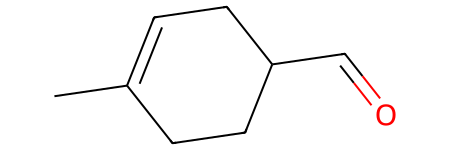

In [34]:
display(da2.RunReactants((m1,m2))[0][0])
da2.RunReactants((m1,m2))[1][0]

Example for bromination of double bond with one regioisomer and also chemoselectivity

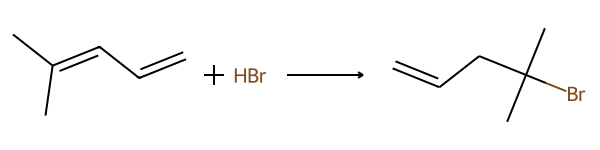

In [11]:
AllChem.ReactionFromSmarts('C/C(C)=C/C=C.Br>>CC(CC=C)(Br)C', useSmiles=True)

In [39]:
t1 = AllChem.ReactionFromSmarts('[BrH;D0;+0:1].[C;H0;D3;+0:2]=[CH;D2;+0:3]>>[Br;H0;D1;+0:1]-[C;H0;D4;+0:2]-[CH2;D2;+0:3]')

In [14]:
t2 = AllChem.ReactionFromSmarts('[BrH;D0;+0:1].[C;H0;D3;+0:2]=[CH;D2;+0:3]>>[Br]-[C]-[C]')

In [8]:
temp = AllChem.ReactionFromSmarts('[Br:1].[C:2]=[C:3]>>[Br:1]-[C:2]-[C:3]')

In [15]:
m1 = Chem.MolFromSmiles('C/C(C)=C/C=C')
m2 = Chem.MolFromSmiles('Br')

print(f'Total mapping: {len(t1.RunReactants((m2,m1)))}')
print(f'Modified mapping: {len(temp.RunReactants((m2,m1)))}')
print(f'Partially modified mapping: {len(t2.RunReactants((m2,m1)))}')

Total mapping: 1
Modified mapping: 4
Partially modified mapping: 1


Products from modified mapping

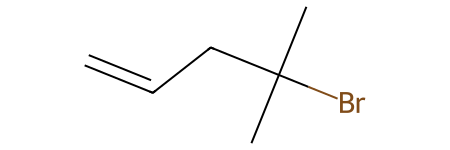

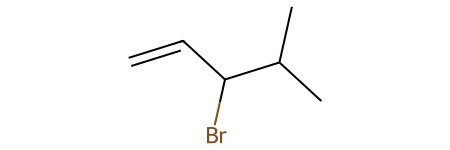

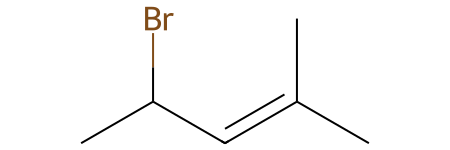

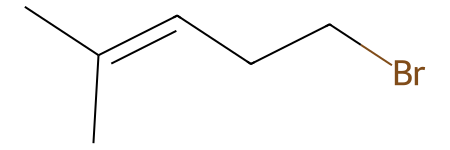

In [44]:
prods = temp.RunReactants((m2,m1))

for p in prods:
    display(p[0]) 

We can see that in the second case we can flag both regioisomers and chemoisomers.

### Analyze general mapping problems

In [3]:
choriso['mapped'].head(10)

0    F-C(-F)(-F)-S(=O)(=O)-O-[c;H0;D3;+0:1].O-B(-O)...
1    [CH;D2;+0:1]=[CH;D2;+0:2]>>[CH2;D2;+0:1]-[CH2;...
2    C-[N+](-C)(-C)-C-C-S(=O)(=O)-O-[CH2;D2;+0:1].[...
3    [C;H0;D2;+0:1]=[N;H0;D2;+0:2].[OH;D1;+0:3]>>[N...
4    C-[O;H0;D2;+0:1].C-[O;H0;D2;+0:2]>>[OH;D1;+0:1...
5    F-[c;H0;D3;+0:1].[N-;H0;D1:2]>>[N;H0;D2;+0:2]-...
6    Br-[CH2;D2;+0:1].[nH;D2;+0:2]>>[CH2;D2;+0:1]-[...
7    C-c1:c:c:c(-S(=O)(=O)-O-[CH2;D2;+0:1]):c:c:1.[...
8    Br-P(-Br)-[Br;H0;D1;+0:1].O-[CH2;D2;+0:2]>>[Br...
9    C1-C-[CH2;D2;+0:1]-[O;H0;D2;+0:2]-C-1.[OH;D1;+...
Name: mapped, dtype: object

In this two reactions the template generation failed after the mapping

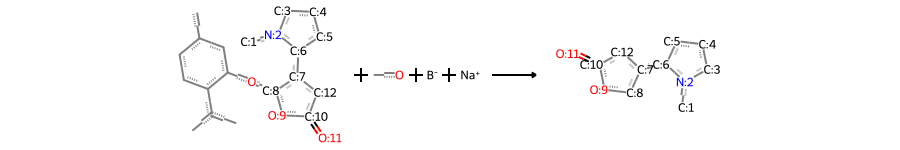

In [5]:
rxn_smi = 'CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O[C@H:8]1[C@H:7]([C@H:6]2[N:2]([CH3:1])[CH2:3][CH2:4][CH2:5]2)[CH2:12][C:10](=[O:11])[O:9]1.CO.[BH4-].[Na+]>>[CH3:1][N:2]1[CH2:3][CH2:4][CH2:5][C@H:6]1[C@H:7]1[CH2:8][O:9][C:10](=[O:11])[CH2:12]1'

AllChem.ReactionFromSmarts(rxn_smi)

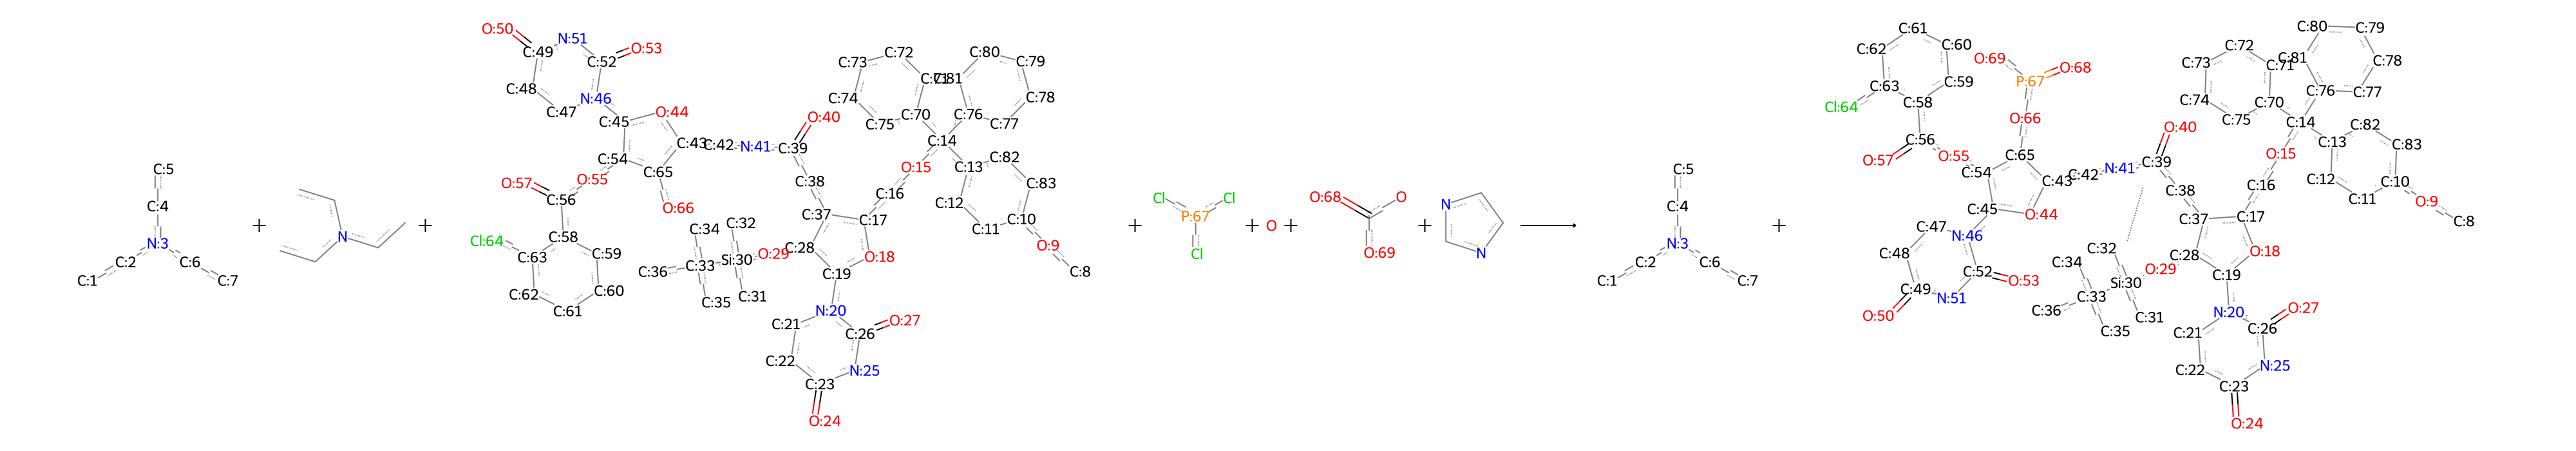

In [14]:
rxn_smi2 = '[CH3:1][CH2:2][N:3]([CH2:4][CH3:5])[CH2:6][CH3:7].CCN(CC)CC.[CH3:8][O:9][c:10]1[cH:11][cH:12][c:13]([C:14]([O:15][CH2:16][C@H:17]2[O:18][C@@H:19]([n:20]3[cH:21][cH:22][c:23](=[O:24])[nH:25][c:26]3=[O:27])[C@H:28]([O:29][Si:30]([CH3:31])([CH3:32])[C:33]([CH3:34])([CH3:35])[CH3:36])[C@@H:37]2[CH2:38][C:39](=[O:40])[NH:41][CH2:42][C@H:43]2[O:44][C@@H:45]([n:46]3[cH:47][cH:48][c:49](=[O:50])[nH:51][c:52]3=[O:53])[C@H:54]([O:55][C:56](=[O:57])[c:58]3[cH:59][cH:60][cH:61][cH:62][c:63]3[Cl:64])[C@@H:65]2[OH:66])([c:70]2[cH:71][cH:72][cH:73][cH:74][cH:75]2)[c:76]2[cH:77][cH:78][cH:79][cH:80][cH:81]2)[cH:82][cH:83]1.Cl[P:67](Cl)Cl.O.OC(=[O:68])[OH:69].c1c[nH]cn1>>[CH3:1][CH2:2][N:3]([CH2:4][CH3:5])[CH2:6][CH3:7].[CH3:8][O:9][c:10]1[cH:11][cH:12][c:13]([C:14]([O:15][CH2:16][C@H:17]2[O:18][C@@H:19]([n:20]3[cH:21][cH:22][c:23](=[O:24])[nH:25][c:26]3=[O:27])[C@H:28]([O:29][Si:30]([CH3:31])([CH3:32])[C:33]([CH3:34])([CH3:35])[CH3:36])[C@@H:37]2[CH2:38][C:39](=[O:40])[NH:41][CH2:42][C@H:43]2[O:44][C@@H:45]([n:46]3[cH:47][cH:48][c:49](=[O:50])[nH:51][c:52]3=[O:53])[C@H:54]([O:55][C:56](=[O:57])[c:58]3[cH:59][cH:60][cH:61][cH:62][c:63]3[Cl:64])[C@@H:65]2[O:66][PH:67](=[O:68])[OH:69])([c:70]2[cH:71][cH:72][cH:73][cH:74][cH:75]2)[c:76]2[cH:77][cH:78][cH:79][cH:80][cH:81]2)[cH:82][cH:83]1'

rxn = AllChem.ReactionFromSmarts(rxn_smi2)

Draw.ReactionToImage(rxn, subImgSize=(400, 700))

In [17]:
#count number of nan in choriso
choriso['mapped'].isna().sum()

2

Analyze some of the mapped reactions

In [21]:
choriso['mapped'].values

array(['F-C(-F)(-F)-S(=O)(=O)-O-[c;H0;D3;+0:1].O-B(-O)-[c;H0;D3;+0:2]>>[c;H0;D3;+0:1]-[c;H0;D3;+0:2]',
       '[CH;D2;+0:1]=[CH;D2;+0:2]>>[CH2;D2;+0:1]-[CH2;D2;+0:2]',
       'C-[N+](-C)(-C)-C-C-S(=O)(=O)-O-[CH2;D2;+0:1].[S-;H0;D1:2]>>[CH2;D2;+0:1]-[S;H0;D2;+0:2]',
       '[C;H0;D2;+0:1]=[N;H0;D2;+0:2].[OH;D1;+0:3]>>[NH;D2;+0:2]-[C;H0;D3;+0:1]-[O;H0;D2;+0:3]',
       'C-[O;H0;D2;+0:1].C-[O;H0;D2;+0:2]>>[OH;D1;+0:1].[OH;D1;+0:2]',
       'F-[c;H0;D3;+0:1].[N-;H0;D1:2]>>[N;H0;D2;+0:2]-[c;H0;D3;+0:1]',
       'Br-[CH2;D2;+0:1].[nH;D2;+0:2]>>[CH2;D2;+0:1]-[n;H0;D3;+0:2]',
       'C-c1:c:c:c(-S(=O)(=O)-O-[CH2;D2;+0:1]):c:c:1.[OH;D1;+0:2]>>[CH2;D2;+0:1]-[O;H0;D2;+0:2]',
       'Br-P(-Br)-[Br;H0;D1;+0:1].O-[CH2;D2;+0:2]>>[Br;H0;D1;+0:1]-[CH2;D2;+0:2]',
       'C1-C-[CH2;D2;+0:1]-[O;H0;D2;+0:2]-C-1.[OH;D1;+0:3]>>[O;H0;D1;+0:2]=[C;H0;D3;+0:1]-[O;H0;D2;+0:3]',
       'Cl-C(-Cl)(-Cl)-O-[C;H0;D3;+0:1]-O-C(-Cl)(-Cl)-[Cl;H0;D1;+0:2].[OH;D1;+0:3]>>[Cl;H0;D1;+0:2]-[C;H0;D3;+0:1]-[O;H0;D2;+0:3]',
     

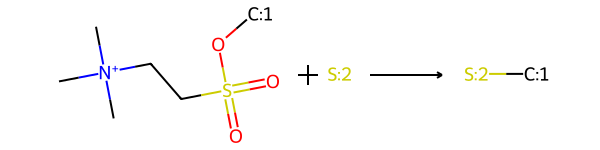

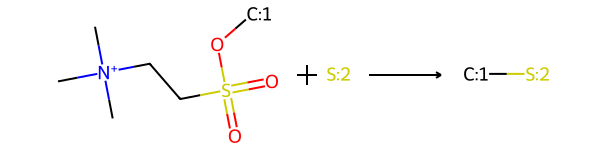

In [3]:
orig = 'C-[N+](-C)(-C)-C-C-S(=O)(=O)-O-[CH2;D2;+0:1].[S-;H0;D1:2]>>[CH2;D2;+0:1]-[S;H0;D2;+0:2]'
mod = 'C-[N+](-C)(-C)-C-C-S(=O)(=O)-O-[C:1].[S:2]>>[C:1]-[S:2]'

display(AllChem.ReactionFromSmarts(orig))
display(AllChem.ReactionFromSmarts(mod))


### Regex to modify SMARTS to the more general case for regio

In [31]:
import re

strings = [
    '[CH;D2;+0:1]=[CH;D2;+0:2]>>[CH2;D2;+0:1]-[CH2;D2;+0:2]',
    'F-[c;H0;D3;+0:1].[N-;H0;D1:2]>>[N;H0;D2;+0:2]-[c;H0;D3;+0:1]',
    'C-C(=O)-[O;H0;D2;+0:1]>>[OH;D1;+0:1]',
    '[CH2;D1;+0:1]=[C;H0;D3;+0:2](-[CH3;D1;+0:3])-[CH;D2;+0:4]=[CH2;D1;+0:5].[CH2;D1;+0:6]=[CH;D2;+0:7]>>[CH3;D1;+0:1]-[C;H0;D3;+0:2]1=[CH;D2;+0:4]-[CH2;D2;+0:5]-[CH2;D2;+0:6]-[CH;D3;+0:7]-[CH2;D2;+0:3]-1',
    '[BrH;D0;+0:1].[C;H0;D3;+0:2]=[CH;D2;+0:3]>>[Br;H0;D1;+0:1]-[C;H0;D4;+0:2]-[CH2;D2;+0:3]',
    'C[N+](C)(C)CCS(=O)(=O)O[CH2:4][CH2:3][CH2:2][CH3:1].[S-:5][C:6](=[S:7])[N:8]([CH3:9])[CH3:10].O>>[CH3:1][CH2:2][CH2:3][CH2:4][S:5][C:6](=[S:7])[N:8]([CH3:9])[CH3:10]',
    'ClCCl.O=C([O-])[O-].O=S(Cl)[Cl:1].O[CH2:2][c:3]1[cH:4][cH:5][c:6]2[c:7]([cH:8]1)[O:9][CH2:10][CH2:11][O:12][CH2:13][CH2:14][O:15][CH2:16][CH2:17][O:18][CH2:19][CH2:20][O:21][CH2:22][CH2:23][O:24]2.[K+].[K+]>>[Cl:1][CH2:2][c:3]1[cH:4][cH:5][c:6]2[c:7]([cH:8]1)[O:9][CH2:10][CH2:11][O:12][CH2:13][CH2:14][O:15][CH2:16][CH2:17][O:18][CH2:19][CH2:20][O:21][CH2:22][CH2:23][O:24]2'
    ]

In [32]:
regex = r'([A-Za-z][a-z]?)[-+]?[A-Za-z]?[0-9]?;(.+?):'
regex2 = r'(\[[A-Za-z][a-z]?)([^>]+?)(:[0-9]\])'
regex3 = r'(\[[A-Za-z][a-z]?)([^>(\])]+?)(:[0-9][0-9]?\])'

for string in strings:
    print(re.sub(regex3, r'\1\3', string))

[C:1]=[C:2]>>[C:1]-[C:2]
F-[c:1].[N:2]>>[N:2]-[c:1]
C-C(=O)-[O:1]>>[O:1]
[C:1]=[C:2](-[C:3])-[C:4]=[C:5].[C:6]=[C:7]>>[C:1]-[C:2]1=[C:4]-[C:5]-[C:6]-[C:7]-[C:3]-1
[Br:1].[C:2]=[C:3]>>[Br:1]-[C:2]-[C:3]
C[N+](C)(C)CCS(=O)(=O)O[C:4][C:3][C:2][C:1].[S:5][C:6](=[S:7])[N:8]([C:9])[C:10].O>>[C:1][C:2][C:3][C:4][S:5][C:6](=[S:7])[N:8]([C:9])[C:10]
ClCCl.O=C([O-])[O-].O=S(Cl)[C:1].O[C:2][c:3]1[c:4][c:5][c:6]2[c:7]([c:8]1)[O:9][C:10][C:11][O:12][C:13][C:14][O:15][C:16][C:17][O:18][C:19][C:20][O:21][C:22][C:23][O:24]2.[K+].[K+]>>[C:1][C:2][c:3]1[c:4][c:5][c:6]2[c:7]([c:8]1)[O:9][C:10][C:11][O:12][C:13][C:14][O:15][C:16][C:17][O:18][C:19][C:20][O:21][C:22][C:23][O:24]2


Apply regex to all reactions in the dataset

In [27]:
#remove nan in the dataset
choriso.dropna(subset='mapped', inplace=True)

In [28]:
choriso.head()

,rxn,prods,rxnclass,top-1,top-2,top-3,top-4,top-5,top-1 acc,top-2 acc,top-3 acc,top-4 acc,top-5 acc,rxnclass_1,regio,mapped
0,CN(C)C=O.COc1ccc2cc(OS(=O)(=O)C(F)(F)F)c(Cc3cc...,COc1ccc2cc(-c3cccnc3)c(Cc3ccccc3)cc2c1,3.1.4,COc1ccc2cc(-c3cccnc3)c(Cc3ccccc3)cc2c1,COc1ccc2cc(-c3cccnc3)c(Cc3ccccc3)cc2c1,COc1ccc2cc(-c3cncnc3)c(Cc3ccccc3)cc2c1,COc1ccc2cc(-c3ccnc3)c(Cc3ccccc3)cc2c1,COc1ccc2cc(-c3cccnc3)c(Cc3ccccc3)cc2c1,True,True,False,False,True,3,False,CN(C)C=O.O=S(=O)(O[c:8]1[cH:7][c:6]2[cH:5][cH:...
1,CCOC(=O)/C=C/CC(F)(F)C(Cl)=N[C@@H](COC)c1ccccc...,CCOC(=O)CCCC(F)(F)C(Cl)=N[C@@H](COC)c1ccccc1,7.6.1,CCOC(=O)CCCC(F)(F)C(Cl)=N[C@@H](COC)c1ccccc1,CCOC(=O)CCCC(F)(F)C(I)=N[C@@H](COC)c1ccccc1,CCOC(=O)CCCC(F)(F)C(Cl)=N[C@@H](COC)c1ccccc1,CCOC(=O)CCCC(F)(F)C(Cl)=N[C@H](COC)c1ccccc1,CCOC(=O)CCCC(F)(F)C(Cl)=N[C@@H](COC)c1ccccc1,True,False,True,False,True,7,False,[CH3:1][CH2:2][O:3][C:4](=[O:5])/[CH:6]=[CH:7]...
2,CCCCOS(=O)(=O)CC[N+](C)(C)C.CN(C)C(=S)[S-].O>>...,CCCCSC(=S)N(C)C,1.8.31,CCCCSC(=S)N(C)C,Br.CCCCSC(=S)N(C)C,CCCCSC(=S)N(C)C.Cl,CCCCSC(=S)N(C)C,CCCCSCC(=S)N(C)C,True,False,False,True,False,1,True,C[N+](C)(C)CCS(=O)(=O)O[CH2:4][CH2:3][CH2:2][C...
3,CC(=O)OC/C=C\C(C)(C)O.Cc1ccc(S(=O)(=O)N=C=O)cc...,CC(=O)OC/C=C\C(C)(C)OC(=O)NS(=O)(=O)c1ccc(C)cc1,2.4.2,CC(=O)OCC=CC(C)(C)OC(=O)NS(=O)(=O)c1ccc(C)cc1,CC(=O)OCC1C=C(C)COC(=O)N1S(=O)(=O)c1ccc(C)cc1,CC(=O)OCC1C=C(C)CN1S(=O)(=O)c1ccc(C)cc1,CC(=O)OCC(CC(C)(C)O)NS(=O)(=O)c1ccc(C)cc1,CC(=O)OC[C@@H]1C=C(C)COC(=O)N1S(=O)(=O)c1ccc(C...,False,False,False,False,False,2,False,[CH3:1][C:2](=[O:3])[O:4][CH2:5]/[CH:6]=[CH:7]...
4,CO.COC(=O)CCC(CCC(=O)OC)NC(=O)OC(C)(C)C.[Na+]....,CC(C)(C)OC(=O)NC(CCC(=O)O)CCC(=O)O,6.2.2,CC(C)(C)OC(=O)NC(CCC(=O)O)CCC(=O)O,COC(=O)CCC(CCC(=O)O)NC(=O)OC(C)(C)C,CC(C)(C)OC(=O)NC(CCC(=O)O)CCC(=O)O,CC(C)(C)OC(=O)NC(CCCC(=O)O)CCC(=O)O,CC(C)(C)OC(=O)NC(CCC(=O)O)CCC(=O)O,True,False,True,False,True,6,False,CO.C[O:14][C:12]([CH2:11][CH2:10][CH:9]([NH:8]...


In [11]:
choriso['general_SMARTS'] = choriso['mapped'].apply(lambda x: re.sub(regex3, r'\1\3', x))

In [9]:
choriso['general_SMARTS'].values

array(['F-C(-F)(-F)-S(=O)(=O)-O-[c:1].O-B(-O)-[c:2]>>[c:1]-[c:2]',
       '[C:1]=[C:2]>>[C:1]-[C:2]',
       'C-[N+](-C)(-C)-C-C-S(=O)(=O)-O-[C:1].[S:2]>>[C:1]-[S:2]',
       '[C:1]=[N:2].[O:3]>>[N:2]-[C:1]-[O:3]',
       'C-[O:1].C-[O:2]>>[O:1].[O:2]', 'F-[c:1].[N:2]>>[N:2]-[c:1]',
       'Br-[C:1].[n:2]>>[C:1]-[n:2]',
       'C-c1:c:c:c(-S(=O)(=O)-O-[C:1]):c:c:1.[O:2]>>[C:1]-[O:2]',
       'Br-P(-Br)-[Br:1].O-[C:2]>>[Br:1]-[C:2]',
       'C1-C-[C:1]-[O:2]-C-1.[O:3]>>[O:2]=[C:1]-[O:3]',
       'Cl-C(-Cl)(-Cl)-O-[C:1]-O-C(-Cl)(-Cl)-[Cl:2].[O:3]>>[Cl:2]-[C:1]-[O:3]',
       'C-C-O-[C:1]=[O:2]>>[C:1]-[O:2]',
       'Cl-S(=O)-[Cl:1].O-[C:2]>>[C:2]-[Cl:1]', 'C-C(=O)-[O:1]>>[O:1]',
       'C-C(=O)-[O:1].Cl-[C:2]>>[C:2]-[O:1]',
       'O=[C:1].[C:2]>>[C:2]=[C:1]', 'C-C(=O)-[O:1]>>[O:1]',
       '[C:1]-[O:2]>>[C:1]=[O:2]',
       'C-C(-C)(-C)-O-C(=O)-[N:1].C-O-[C:2]>>[C:2]-[N:1]',
       '[C:1]=[N:2].[N:3]>>[N:2]-[C:1]-[N:3]',
       'C-O-[C:1].O=[N:2]-[O-]>>[C:1]-[N:2]',
       'O-S(=O)(=O)-

In [74]:
smarts = [AllChem.ReactionFromSmarts(x) for x in choriso['general_SMARTS'].values]

### Analyze flag_regio_problem

In [24]:
choriso['template'] = choriso['mapped'].apply(template_smarts_from_mapped_smiles)

In [6]:
import re

regex = r'(\[[A-Za-z][a-z]?)([^>(\])]+?)(:[0-9]\])'
choriso['general_SMARTS'] = choriso['template'].apply(lambda x: re.sub(regex, r'\1\3', x))

In [7]:
flagged = choriso[choriso['regio'] == True]

In [15]:
def visualize_reaction(rxn, map, template):
    rxn = AllChem.ReactionFromSmarts(rxn, useSmiles=True)
    
    display(Draw.ReactionToImage(rxn, subImgSize=(300, 300)))
    print(f'Original: {map}')
    print(f'Modified: {template}')

def generate_products(rxn, map, general):

    def _sanitize_filter_prods(prods):
        good = []
        for prod in prods:
            try: 
                x = Chem.SanitizeMol(prod[0])
                good.append(Chem.MolToSmiles(prod[0]))
            except:
                pass
        return set(good)

    r = select_reagents(rxn, map)

    #check if reactants generate several products
    reaction = AllChem.ReactionFromSmarts(general)
    reaction.Initialize()

    try:
            
        new_products = reaction.RunReactants(r)
        if new_products == ():
            pass
        else:
            products = _sanitize_filter_prods(new_products)

        return products
    except:
        return False



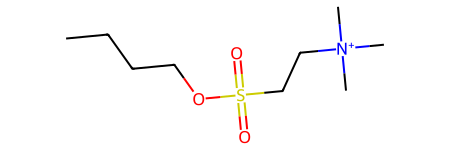

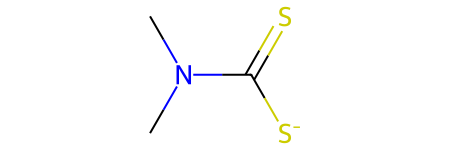

In [6]:
#write function to select the correct reactants:
test_map = 'C-[N+](-C)(-C)-C-C-S(=O)(=O)-O-[CH2;D2;+0:1].[S-;H0;D1:2]>>[CH2;D2;+0:1]-[S;H0;D2;+0:2]'
test_map2 = '[S-;H0;D1:2]>>[CH2;D2;+0:1]-[S;H0;D2;+0:2]'

def select_reagents(rxn, map):
    reaction = AllChem.ReactionFromSmarts(map)
    mols = [Chem.MolFromSmiles(smi) for smi in rxn.split('>>')[0].split('.')]
    reactant_templates = reaction.GetReactants()

    if len(reactant_templates) == 2:
        #check which species from mols match each reactant template
        reactant_matches = [mol.HasSubstructMatch(reactant_templates[0]) for mol in mols]
        reactant_matches2 = [mol.HasSubstructMatch(reactant_templates[1]) for mol in mols]
        #select True index in reactant_matches and reactant_matches2
        reactant_matches_index = reactant_matches.index(True)
        reactant_matches2_index = reactant_matches2.index(True)
        #select the correct order
        r1 = mols[reactant_matches_index]
        r2 = mols[reactant_matches2_index]

        return r1, r2

    if len(reactant_templates) == 1:
        reactant_matches = [mol.HasSubstructMatch(reactant_templates[0]) for mol in mols]
        reactant_matches_index = reactant_matches.index(True)
        r1 = mols[reactant_matches_index]
        return r1,
    

rxn = 'CCCCOS(=O)(=O)CC[N+](C)(C)C.CN(C)C(=S)[S-].O>>CCCCSC(=S)N(C)C'   

for i in select_reagents(rxn, test_map):
    display(i)

In [9]:
flagged.head()

,rxn,prods,rxnclass,top-1,top-2,top-3,top-4,top-5,top-1 acc,top-2 acc,top-3 acc,top-4 acc,top-5 acc,rxnclass_1,regio,mapped,template,general_SMARTS
2,CCCCOS(=O)(=O)CC[N+](C)(C)C.CN(C)C(=S)[S-].O>>...,CCCCSC(=S)N(C)C,1.8.31,CCCCSC(=S)N(C)C,Br.CCCCSC(=S)N(C)C,CCCCSC(=S)N(C)C.Cl,CCCCSC(=S)N(C)C,CCCCSCC(=S)N(C)C,True,False,False,True,False,1,True,C[N+](C)(C)CCS(=O)(=O)O[CH2:4][CH2:3][CH2:2][C...,C-[N+](-C)(-C)-C-C-S(=O)(=O)-O-[CH2;D2;+0:1].[...,C-[N+](-C)(-C)-C-C-S(=O)(=O)-O-[C:1].[S:2]>>[C...
23,CN(C)C=O.ClCCl.O=C(Cl)C(=O)Cl.O=C(O)c1cc(OCc2c...,O=C(Cl)c1cc(OCc2ccccc2)c(C(=O)Nc2ccccc2C(=O)OC...,9.3.1,O=C(Cl)c1cc(OCc2ccccc2)c(C(=O)Nc2ccccc2C(=O)OC...,N#Cc1cc(OCc2ccccc2)c(C(=O)Nc2ccccc2C(=O)OCc2cc...,O=C(Cl)c1cc(OCc2ccccc2)c(C(=O)Nc2ccccc2C(=O)Oc...,O=C(O)c1cc(OCc2ccccc2)c(C(=O)Nc2ccccc2C(=O)OCc...,O=C(Cl)c1cc(OCc2ccccc2)c(C(=O)Nc2ccccc2C(=O)O)...,True,False,False,False,False,9,True,CN(C)C=O.ClCCl.O=C(Cl)C(=O)[Cl:3].O[C:2](=[O:1...,Cl-C(=O)-C(=O)-[Cl;H0;D1;+0:1].O-[C;H0;D3;+0:2...,Cl-C(=O)-C(=O)-[Cl:1].O-[C:2]>>[C:2]-[Cl:1]
28,CC(=O)O.C[C@H](NC(=O)OC(C)(C)C)C(=O)N[C@@H](CN...,C[C@H](NC(=O)[C@H](CN(CC(=O)OCc1ccc([N+](=O)[O...,9.7.61,C[C@H](NC(=O)[C@H](CN(CC(=O)O)CC(=O)O)NC(=O)[C...,C[C@H](NC(=O)[C@H](CN(CC(N)=O)CC(=O)O)NC(=O)[C...,C[C@H](NC(=O)C(CN(CC(=O)O)CC(=O)O)NC(=O)[C@H](...,C[C@H](NC(=O)[C@H](CN(CC(N)=O)CC(=O)O)NC(=O)[C...,Invalid SMILES,False,False,False,False,False,9,True,CC(=O)O.O=[N+]([O-])c1ccc(C[O:52][C:50]([C@H:2...,O=[N+](-[O-])-c1:c:c:c(-C-[O;H0;D2;+0:1]):c:c:...,O=[N+](-[O-])-c1:c:c:c(-C-[O:1]):c:c:1>>[O:1]
29,ClCCl.O=C([O-])[O-].[K+].[K+].O=S(Cl)Cl.OCc1cc...,ClCc1ccc2c(c1)OCCOCCOCCOCCOCCO2,9.1.10,ClCc1ccc2c(c1)OCCOCCOCCOCCOCCO2,C=C1C=CC2(C=C1)OCCOCCOCCOCCOCCO2,ClC12C=COCc3ccc1c(c3)OCCOCCOCCOCCOCCO2,C1=C\C2=C/C=C/C(=C/1)OCCOCCOCCOCCOCCO2,Invalid SMILES,True,False,False,False,False,9,True,ClCCl.O=C([O-])[O-].O=S(Cl)[Cl:1].O[CH2:2][c:3...,Cl-S(=O)-[Cl;H0;D1;+0:1].O-[CH2;D2;+0:2]>>[CH2...,Cl-S(=O)-[Cl:1].O-[C:2]>>[C:2]-[Cl:1]
32,CC1(C)O[C@@H]2[C@H](O1)[C@@H](C(=O)NC1CC1)O[C@...,O=C(NC1CC1)[C@H]1O[C@@H](n2cnc3c(NCCc4cn(CCN5C...,6.3.16,O=C(NC1CC1)[C@H]1O[C@@H](n2cnc3c(NCCc4cn(CCN5C...,O=C(NC1CC1)[C@H]1O[C@@H](n2cnc3c(NCCc4cn(CCN5C...,O=C(NC1CC1)[C@H]1OC(n2cnc3c(NCCc4cn(CCN5CCCC5)...,Invalid SMILES,O=C(NC1CC1)[C@@H]1O[C@@H](n2cnc3c(NCCc4cn(CCN5...,True,False,False,False,False,6,True,CC1(C)[O:39][C@H:38]2[C@H:9]([n:10]3[cH:11][n:...,C-C(-C)(-[O;H0;D2;+0:1])-[O;H0;D2;+0:2]>>[OH;D...,C-C(-C)(-[O:1])-[O:2]>>[O:1].[O:2]


CCCCOS(=O)(=O)CC[N+](C)(C)C.CN(C)C(=S)[S-].O>>CCCCSC(=S)N(C)C


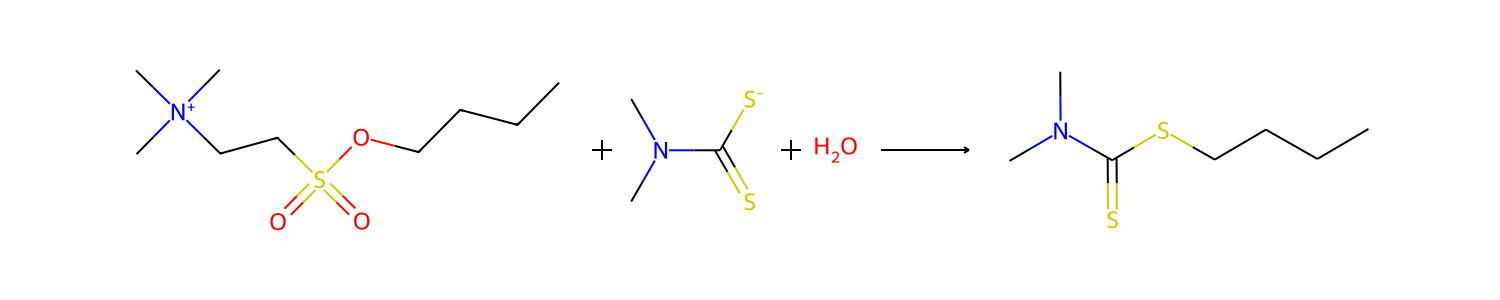

Original: C-[N+](-C)(-C)-C-C-S(=O)(=O)-O-[CH2;D2;+0:1].[S-;H0;D1:2]>>[CH2;D2;+0:1]-[S;H0;D2;+0:2]
Modified: C-[N+](-C)(-C)-C-C-S(=O)(=O)-O-[C:1].[S:2]>>[C:1]-[S:2]
C[N+](C)(C)CCS(=O)(=O)O[CH2:4][CH2:3][CH2:2][CH3:1].[S-:5][C:6](=[S:7])[N:8]([CH3:9])[CH3:10].O>>[CH3:1][CH2:2][CH2:3][CH2:4][S:5][C:6](=[S:7])[N:8]([CH3:9])[CH3:10]


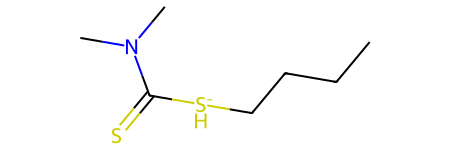

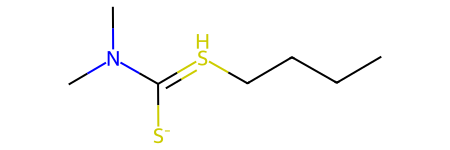

CN(C)C=O.ClCCl.O=C(Cl)C(=O)Cl.O=C(O)c1cc(OCc2ccccc2)c(C(=O)Nc2ccccc2C(=O)OCc2ccccc2)c(OCc2ccccc2)c1>>O=C(Cl)c1cc(OCc2ccccc2)c(C(=O)Nc2ccccc2C(=O)OCc2ccccc2)c(OCc2ccccc2)c1


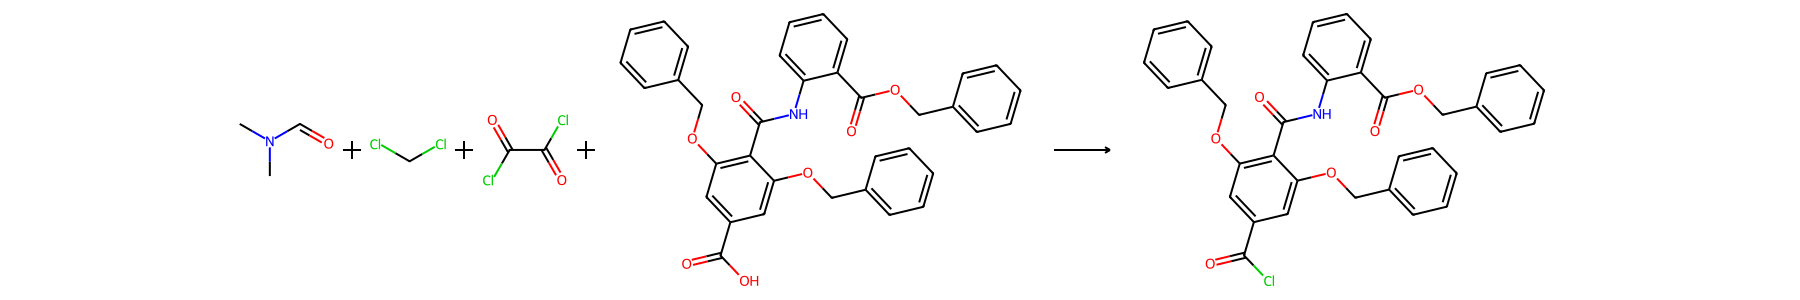

Original: Cl-C(=O)-C(=O)-[Cl;H0;D1;+0:1].O-[C;H0;D3;+0:2]>>[C;H0;D3;+0:2]-[Cl;H0;D1;+0:1]
Modified: Cl-C(=O)-C(=O)-[Cl:1].O-[C:2]>>[C:2]-[Cl:1]
CN(C)C=O.ClCCl.O=C(Cl)C(=O)[Cl:3].O[C:2](=[O:1])[c:4]1[cH:5][c:6]([O:7][CH2:8][c:9]2[cH:10][cH:11][cH:12][cH:13][cH:14]2)[c:15]([C:16](=[O:17])[NH:18][c:19]2[cH:20][cH:21][cH:22][cH:23][c:24]2[C:25](=[O:26])[O:27][CH2:28][c:29]2[cH:30][cH:31][cH:32][cH:33][cH:34]2)[c:35]([O:36][CH2:37][c:38]2[cH:39][cH:40][cH:41][cH:42][cH:43]2)[cH:44]1>>[O:1]=[C:2]([Cl:3])[c:4]1[cH:5][c:6]([O:7][CH2:8][c:9]2[cH:10][cH:11][cH:12][cH:13][cH:14]2)[c:15]([C:16](=[O:17])[NH:18][c:19]2[cH:20][cH:21][cH:22][cH:23][c:24]2[C:25](=[O:26])[O:27][CH2:28][c:29]2[cH:30][cH:31][cH:32][cH:33][cH:34]2)[c:35]([O:36][CH2:37][c:38]2[cH:39][cH:40][cH:41][cH:42][cH:43]2)[cH:44]1


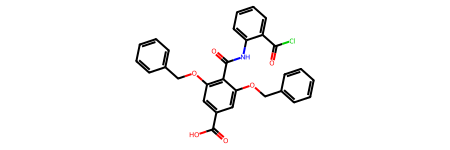

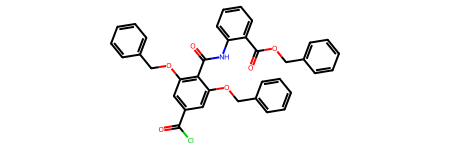

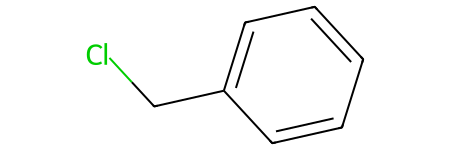

CC(=O)O.C[C@H](NC(=O)OC(C)(C)C)C(=O)N[C@@H](CN(CC(=O)OCc1ccc([N+](=O)[O-])cc1)CC(=O)OCc1ccc([N+](=O)[O-])cc1)C(=O)N[C@@H](C)C(=O)OCc1ccc([N+](=O)[O-])cc1.[Zn]>>C[C@H](NC(=O)[C@H](CN(CC(=O)OCc1ccc([N+](=O)[O-])cc1)CC(=O)OCc1ccc([N+](=O)[O-])cc1)NC(=O)[C@H](C)NC(=O)OC(C)(C)C)C(=O)O


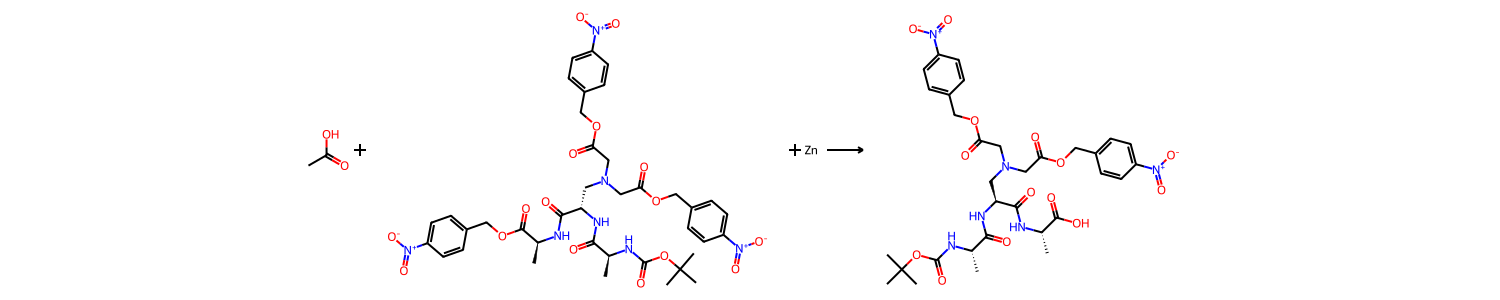

Original: O=[N+](-[O-])-c1:c:c:c(-C-[O;H0;D2;+0:1]):c:c:1>>[OH;D1;+0:1]
Modified: O=[N+](-[O-])-c1:c:c:c(-C-[O:1]):c:c:1>>[O:1]
CC(=O)O.O=[N+]([O-])c1ccc(C[O:52][C:50]([C@H:2]([CH3:1])[NH:3][C:4](=[O:5])[C@H:6]([CH2:7][N:8]([CH2:9][C:10](=[O:11])[O:12][CH2:13][c:14]2[cH:15][cH:16][c:17]([N+:18](=[O:19])[O-:20])[cH:21][cH:22]2)[CH2:23][C:24](=[O:25])[O:26][CH2:27][c:28]2[cH:29][cH:30][c:31]([N+:32](=[O:33])[O-:34])[cH:35][cH:36]2)[NH:37][C:38](=[O:39])[C@H:40]([CH3:41])[NH:42][C:43](=[O:44])[O:45][C:46]([CH3:47])([CH3:48])[CH3:49])=[O:51])cc1.[Zn]>>[CH3:1][C@H:2]([NH:3][C:4](=[O:5])[C@H:6]([CH2:7][N:8]([CH2:9][C:10](=[O:11])[O:12][CH2:13][c:14]1[cH:15][cH:16][c:17]([N+:18](=[O:19])[O-:20])[cH:21][cH:22]1)[CH2:23][C:24](=[O:25])[O:26][CH2:27][c:28]1[cH:29][cH:30][c:31]([N+:32](=[O:33])[O-:34])[cH:35][cH:36]1)[NH:37][C:38](=[O:39])[C@H:40]([CH3:41])[NH:42][C:43](=[O:44])[O:45][C:46]([CH3:47])([CH3:48])[CH3:49])[C:50](=[O:51])[OH:52]


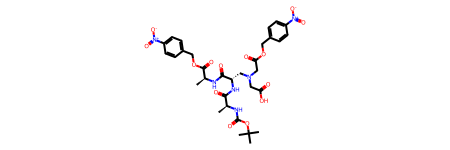

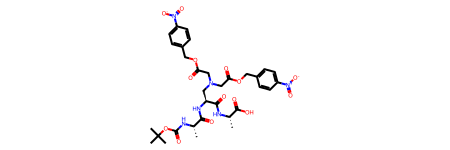

ClCCl.O=C([O-])[O-].[K+].[K+].O=S(Cl)Cl.OCc1ccc2c(c1)OCCOCCOCCOCCOCCO2>>ClCc1ccc2c(c1)OCCOCCOCCOCCOCCO2


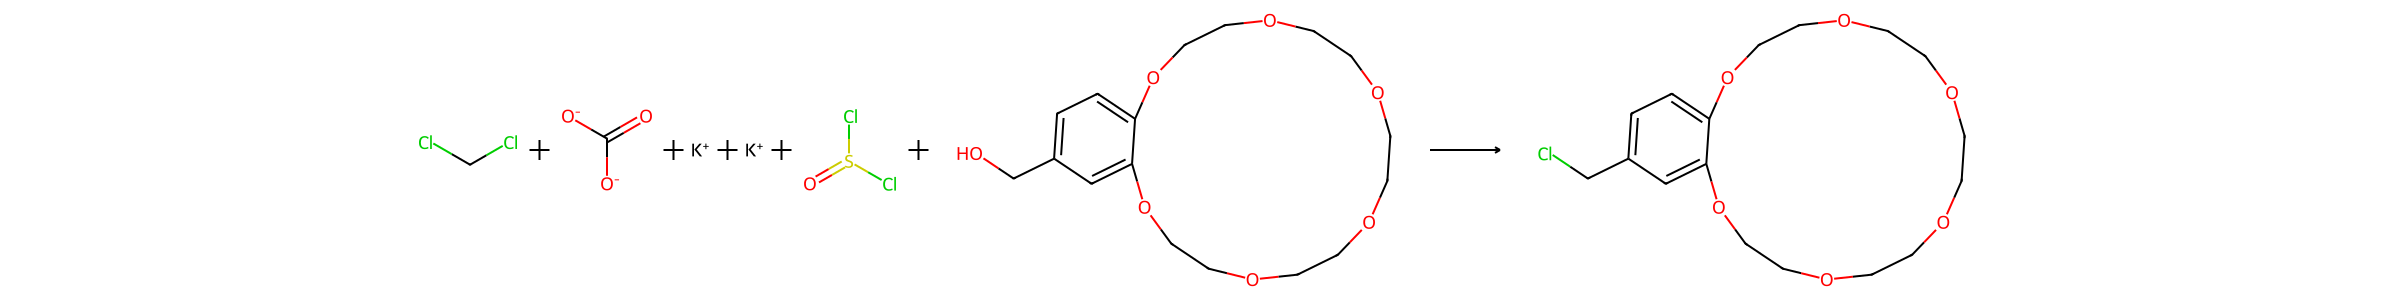

Original: Cl-S(=O)-[Cl;H0;D1;+0:1].O-[CH2;D2;+0:2]>>[CH2;D2;+0:2]-[Cl;H0;D1;+0:1]
Modified: Cl-S(=O)-[Cl:1].O-[C:2]>>[C:2]-[Cl:1]
ClCCl.O=C([O-])[O-].O=S(Cl)[Cl:1].O[CH2:2][c:3]1[cH:4][cH:5][c:6]2[c:7]([cH:8]1)[O:9][CH2:10][CH2:11][O:12][CH2:13][CH2:14][O:15][CH2:16][CH2:17][O:18][CH2:19][CH2:20][O:21][CH2:22][CH2:23][O:24]2.[K+].[K+]>>[Cl:1][CH2:2][c:3]1[cH:4][cH:5][c:6]2[c:7]([cH:8]1)[O:9][CH2:10][CH2:11][O:12][CH2:13][CH2:14][O:15][CH2:16][CH2:17][O:18][CH2:19][CH2:20][O:21][CH2:22][CH2:23][O:24]2


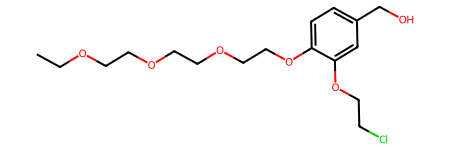

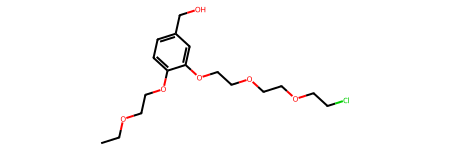

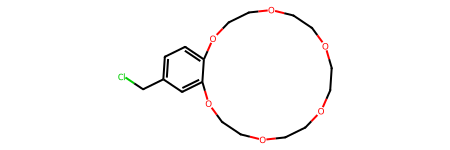

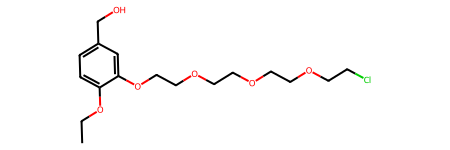

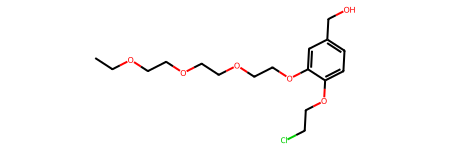

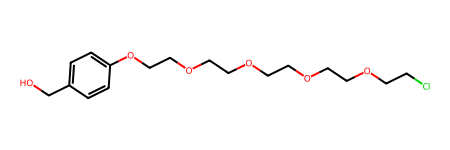

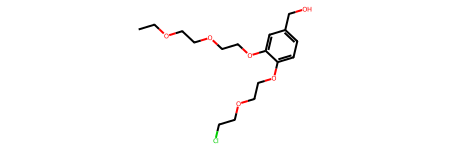

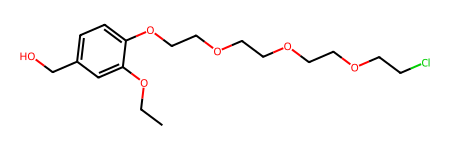

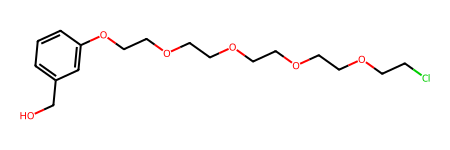

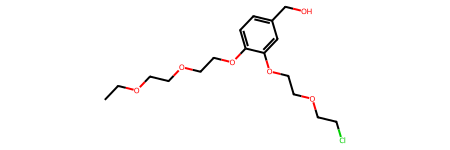

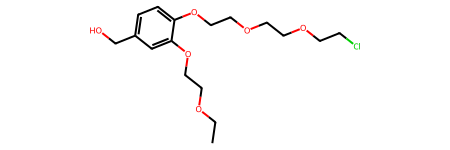

CC1(C)O[C@@H]2[C@H](O1)[C@@H](C(=O)NC1CC1)O[C@H]2n1cnc2c(NCCc3cn(CCN4CCCC4)c4ccccc34)ncnc21.O=CO>>O=C(NC1CC1)[C@H]1O[C@@H](n2cnc3c(NCCc4cn(CCN5CCCC5)c5ccccc45)ncnc32)[C@H](O)[C@@H]1O


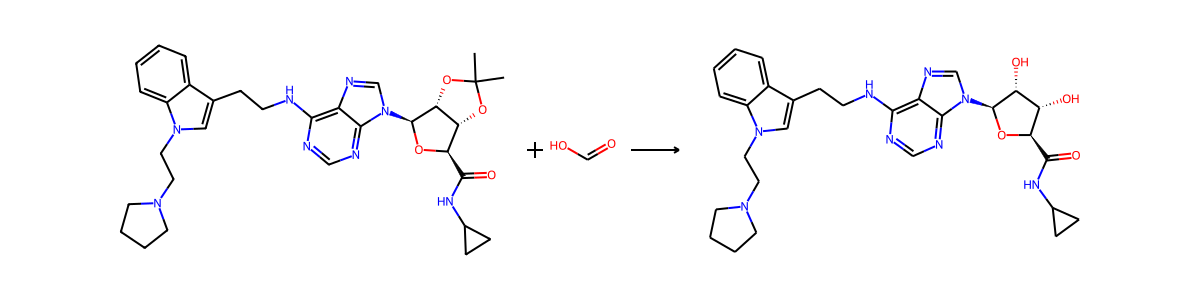

Original: C-C(-C)(-[O;H0;D2;+0:1])-[O;H0;D2;+0:2]>>[OH;D1;+0:1].[OH;D1;+0:2]
Modified: C-C(-C)(-[O:1])-[O:2]>>[O:1].[O:2]
CC1(C)[O:39][C@H:38]2[C@H:9]([n:10]3[cH:11][n:12][c:13]4[c:14]([NH:15][CH2:16][CH2:17][c:18]5[cH:19][n:20]([CH2:21][CH2:22][N:23]6[CH2:24][CH2:25][CH2:26][CH2:27]6)[c:28]6[cH:29][cH:30][cH:31][cH:32][c:33]56)[n:34][cH:35][n:36][c:37]34)[O:8][C@H:7]([C:2](=[O:1])[NH:3][CH:4]3[CH2:5][CH2:6]3)[C@H:40]2[O:41]1.O=CO>>[O:1]=[C:2]([NH:3][CH:4]1[CH2:5][CH2:6]1)[C@H:7]1[O:8][C@@H:9]([n:10]2[cH:11][n:12][c:13]3[c:14]([NH:15][CH2:16][CH2:17][c:18]4[cH:19][n:20]([CH2:21][CH2:22][N:23]5[CH2:24][CH2:25][CH2:26][CH2:27]5)[c:28]5[cH:29][cH:30][cH:31][cH:32][c:33]45)[n:34][cH:35][n:36][c:37]23)[C@H:38]([OH:39])[C@@H:40]1[OH:41]


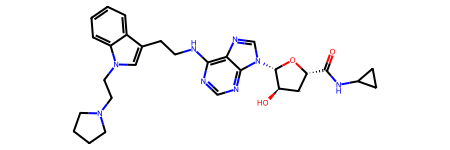

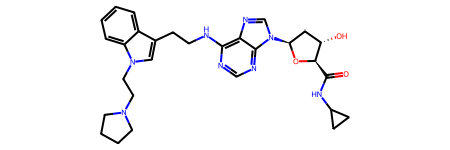

C=CC[C@@]1(C)C(CCC2OCCO2)=C[C@H](O)C[C@@H]1C.CN(C)C=O.Cl[Pd]Cl.O.[Cu].[O]>>CC(=O)C[C@@]1(C)C(CCC2OCCO2)=C[C@H](O)C[C@@H]1C


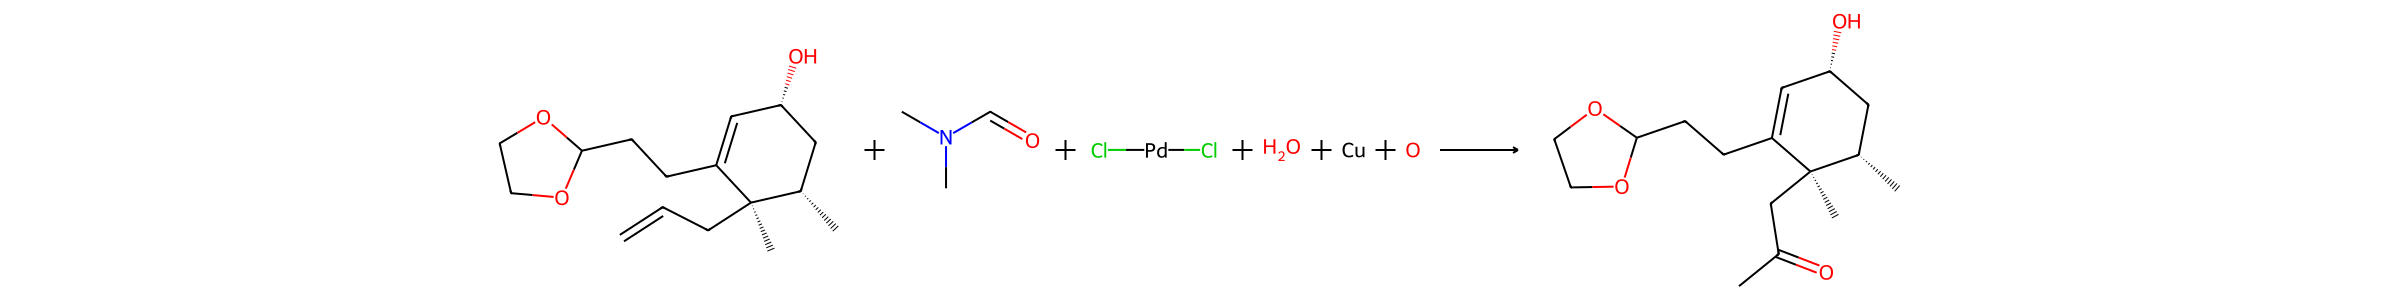

Original: C-N(-C)-C=[O;H0;D1;+0:1].[CH2;D1;+0:2]=[CH;D2;+0:3]>>[CH3;D1;+0:2]-[C;H0;D3;+0:3]=[O;H0;D1;+0:1]
Modified: C-N(-C)-C=[O:1].[C:2]=[C:3]>>[C:2]-[C:3]=[O:1]
[CH2:1]=[CH:2][CH2:4][C@@:5]1([CH3:6])[C:7]([CH2:8][CH2:9][CH:10]2[O:11][CH2:12][CH2:13][O:14]2)=[CH:15][C@H:16]([OH:17])[CH2:18][C@@H:19]1[CH3:20].CN(C)C=[O:3].Cl[Pd]Cl.O.[Cu].[O]>>[CH3:1][C:2](=[O:3])[CH2:4][C@@:5]1([CH3:6])[C:7]([CH2:8][CH2:9][CH:10]2[O:11][CH2:12][CH2:13][O:14]2)=[CH:15][C@H:16]([OH:17])[CH2:18][C@@H:19]1[CH3:20]


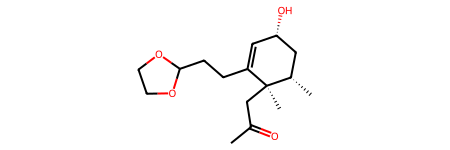

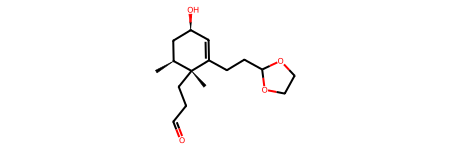

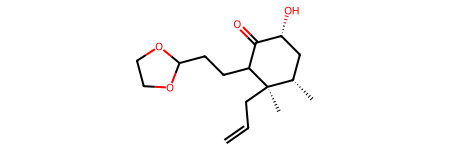

C1CCOC1.CCCCCCCCCCCCOC(=O)C[C@@]1(O)C(=O)C[C@H]2[C@@H]3CC=C4C[C@@H](O[Si](C)(C)C(C)(C)C)CC[C@]4(C)[C@H]3CC[C@@]21C.[BH4-].[Na+].[Ce+3].[Cl-].[Cl-].[Cl-]>>CCCCCCCCCCCCOC(=O)C[C@@]1(O)[C@@H](O)C[C@H]2[C@@H]3CC=C4C[C@@H](O[Si](C)(C)C(C)(C)C)CC[C@]4(C)[C@H]3CC[C@@]21C


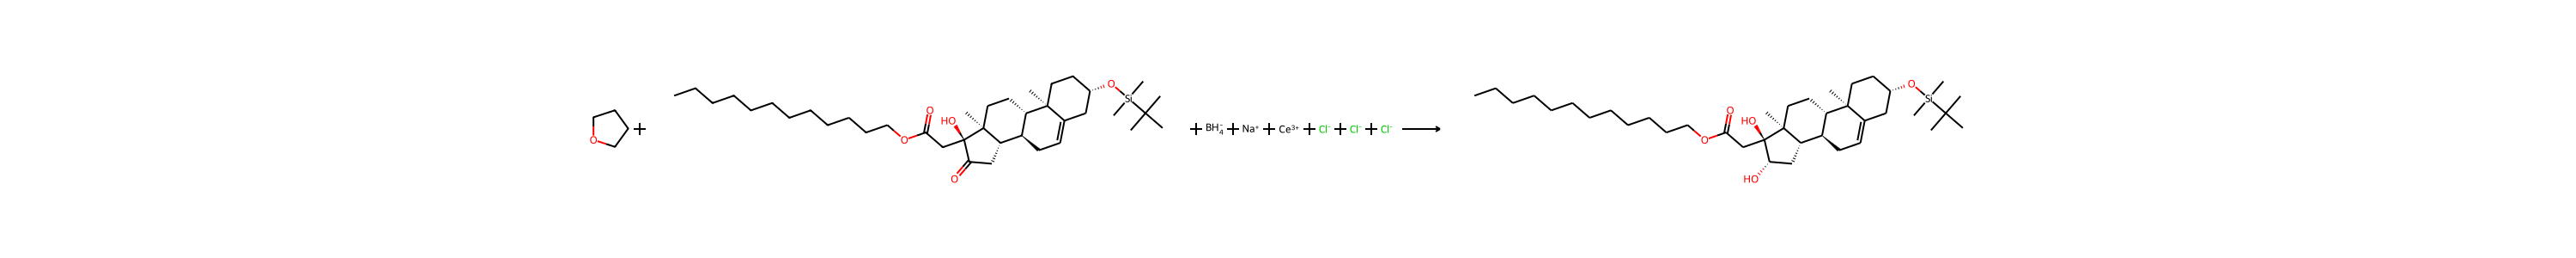

Original: [C;H0;D3;+0:1]=[O;H0;D1;+0:2]>>[C@@H;D3;+0:1]-[OH;D1;+0:2]
Modified: [C:1]=[O:2]>>[C:1]-[O:2]
C1CCOC1.[CH3:1][CH2:2][CH2:3][CH2:4][CH2:5][CH2:6][CH2:7][CH2:8][CH2:9][CH2:10][CH2:11][CH2:12][O:13][C:14](=[O:15])[CH2:16][C@@:17]1([OH:18])[C:19](=[O:20])[CH2:21][C@H:22]2[C@@H:23]3[CH2:24][CH:25]=[C:26]4[CH2:27][C@@H:28]([O:29][Si:30]([CH3:31])([CH3:32])[C:33]([CH3:34])([CH3:35])[CH3:36])[CH2:37][CH2:38][C@:39]4([CH3:40])[C@H:41]3[CH2:42][CH2:43][C@:44]12[CH3:45].[BH4-].[Ce+3].[Cl-].[Cl-].[Cl-].[Na+]>>[CH3:1][CH2:2][CH2:3][CH2:4][CH2:5][CH2:6][CH2:7][CH2:8][CH2:9][CH2:10][CH2:11][CH2:12][O:13][C:14](=[O:15])[CH2:16][C@@:17]1([OH:18])[C@@H:19]([OH:20])[CH2:21][C@H:22]2[C@@H:23]3[CH2:24][CH:25]=[C:26]4[CH2:27][C@@H:28]([O:29][Si:30]([CH3:31])([CH3:32])[C:33]([CH3:34])([CH3:35])[CH3:36])[CH2:37][CH2:38][C@:39]4([CH3:40])[C@H:41]3[CH2:42][CH2:43][C@:44]12[CH3:45]


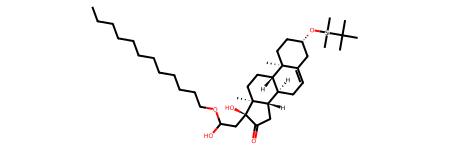

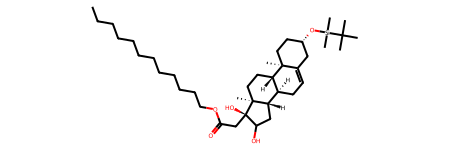

C(=NC1CCCCC1)=NC1CCCCC1.CCN(C(C)C)C(C)C.CN(C)C=O.ClCCl.NCC(=O)OCc1ccccc1.Nc1cc(N)cc(C(=O)O)c1.On1nnc2ccccc21>>Nc1cc(N)cc(C(=O)NCC(=O)OCc2ccccc2)c1


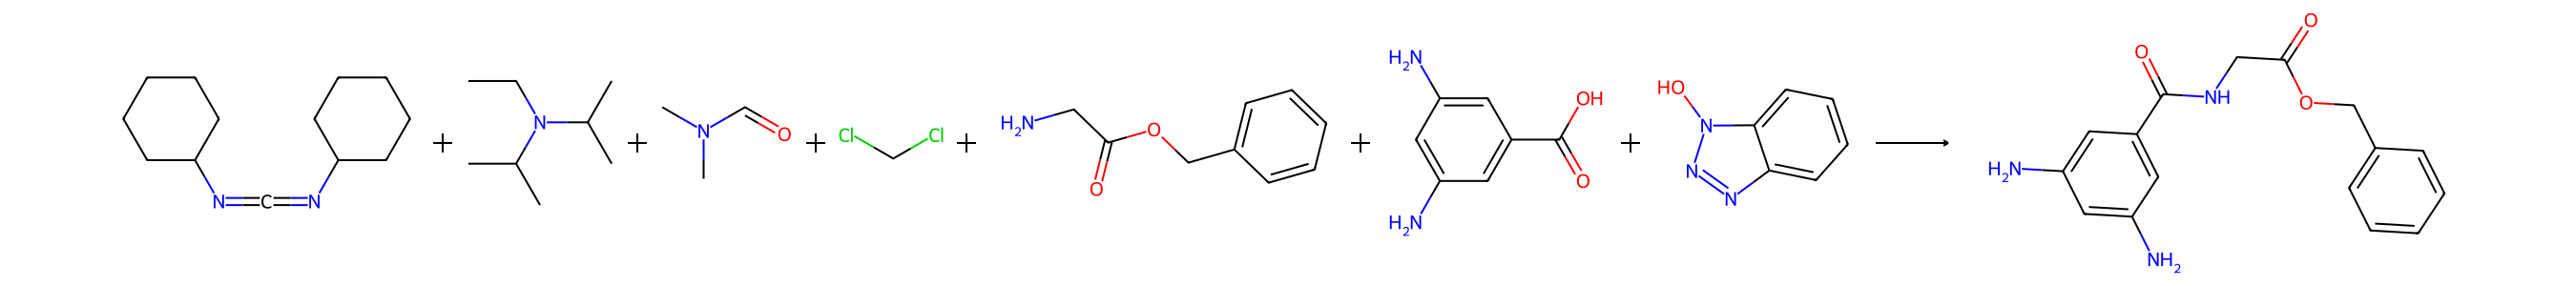

Original: O-[C;H0;D3;+0:1].[NH2;D1;+0:2]>>[C;H0;D3;+0:1]-[NH;D2;+0:2]
Modified: O-[C:1].[N:2]>>[C:1]-[N:2]
C(=NC1CCCCC1)=NC1CCCCC1.CCN(C(C)C)C(C)C.CN(C)C=O.ClCCl.[NH2:10][CH2:11][C:12](=[O:13])[O:14][CH2:15][c:16]1[cH:17][cH:18][cH:19][cH:20][cH:21]1.O[C:8]([c:7]1[cH:6][c:4]([NH2:5])[cH:3][c:2]([NH2:1])[cH:22]1)=[O:9].On1nnc2ccccc21>>[NH2:1][c:2]1[cH:3][c:4]([NH2:5])[cH:6][c:7]([C:8](=[O:9])[NH:10][CH2:11][C:12](=[O:13])[O:14][CH2:15][c:16]2[cH:17][cH:18][cH:19][cH:20][cH:21]2)[cH:22]1


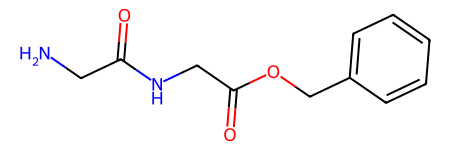

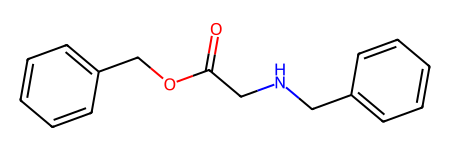

CC(C)CO.COC(=O)CC(C)=O.Cc1ccccc1.[I].[Zn]>>CC(=O)CC(=O)OCC(C)C


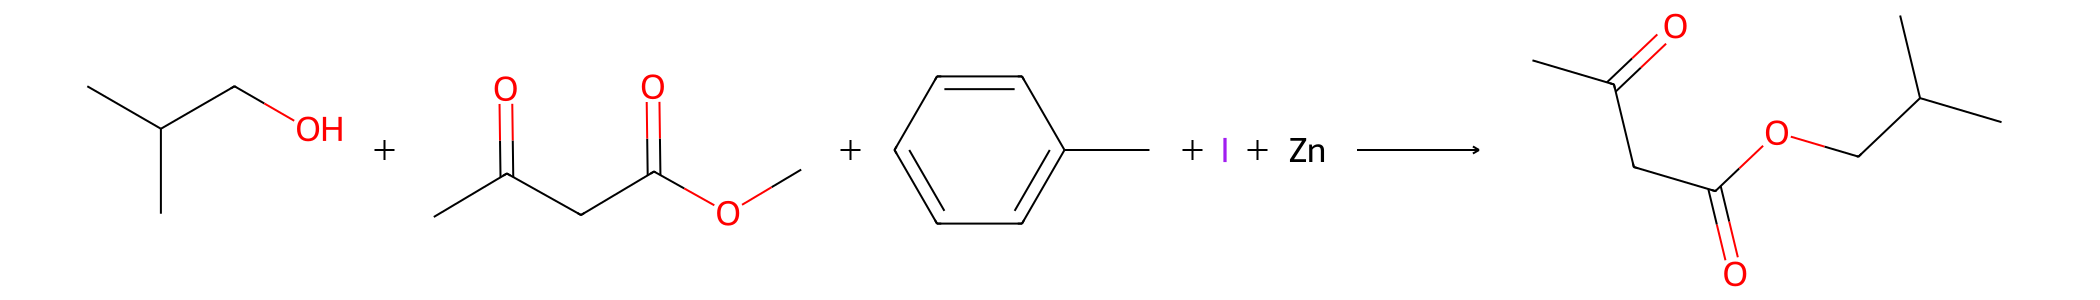

Original: C-O-[C;H0;D3;+0:1].[OH;D1;+0:2]>>[C;H0;D3;+0:1]-[O;H0;D2;+0:2]
Modified: C-O-[C:1].[O:2]>>[C:1]-[O:2]
[OH:7][CH2:8][CH:9]([CH3:10])[CH3:11].CO[C:5]([CH2:4][C:2]([CH3:1])=[O:3])=[O:6].Cc1ccccc1.[I].[Zn]>>[CH3:1][C:2](=[O:3])[CH2:4][C:5](=[O:6])[O:7][CH2:8][CH:9]([CH3:10])[CH3:11]


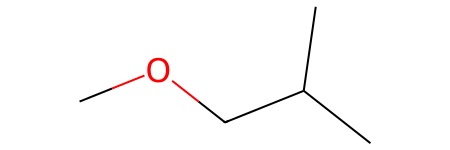

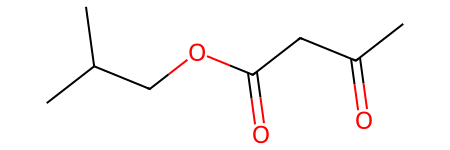

C1COCCO1.CC(=O)O[Pd]OC(C)=O.CCCCC#COc1cccc(C)c1.O=C([O-])[O-].[Na+].[Na+].OB(O)c1ccc(-c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1>>CCCC/C=C(\Oc1cccc(C)c1)c1ccc(-c2ccccc2)cc1


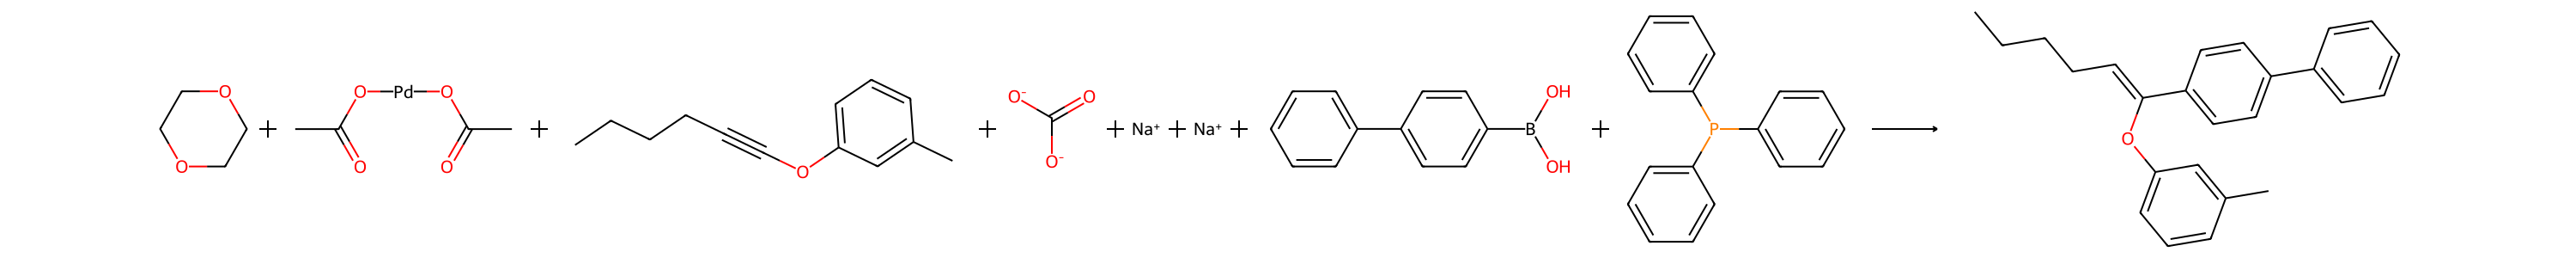

Original: O-B(-O)-[c;H0;D3;+0:1].[C;H0;D2;+0:2]#[C;H0;D2;+0:3]>>[CH;D2;+0:2]=[C;H0;D3;+0:3]/[c;H0;D3;+0:1]
Modified: O-B(-O)-[c:1].[C:2]#[C:3]>>[C:2]=[C:3]/[c:1]
C1COCCO1.CC(=O)O[Pd]OC(C)=O.[CH3:1][CH2:2][CH2:3][CH2:4][C:5]#[C:6][O:7][c:8]1[cH:9][cH:10][cH:11][c:12]([CH3:13])[cH:14]1.O=C([O-])[O-].OB(O)[c:15]1[cH:16][cH:17][c:18](-[c:19]2[cH:20][cH:21][cH:22][cH:23][cH:24]2)[cH:25][cH:26]1.[Na+].[Na+].c1ccc(P(c2ccccc2)c2ccccc2)cc1>>[CH3:1][CH2:2][CH2:3][CH2:4]/[CH:5]=[C:6](\[O:7][c:8]1[cH:9][cH:10][cH:11][c:12]([CH3:13])[cH:14]1)[c:15]1[cH:16][cH:17][c:18](-[c:19]2[cH:20][cH:21][cH:22][cH:23][cH:24]2)[cH:25][cH:26]1


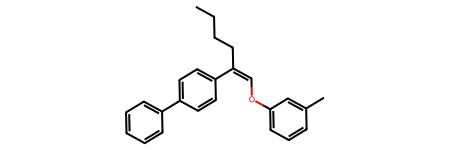

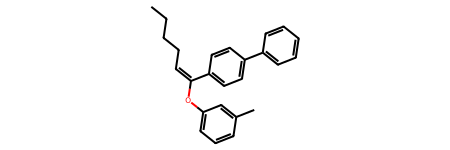

CC(=O)[O-].CC(=O)[O-].CC(=O)[O-].CC(=O)[O-].[Pb+4].CCCCC/C=C\C[C@@H](O[Si](C)(C)C(C)(C)C)[C@@H](O)CO.ClCCl.O=C([O-])[O-].[K+].[K+]>>CCCCC/C=C\C[C@H](C=O)O[Si](C)(C)C(C)(C)C


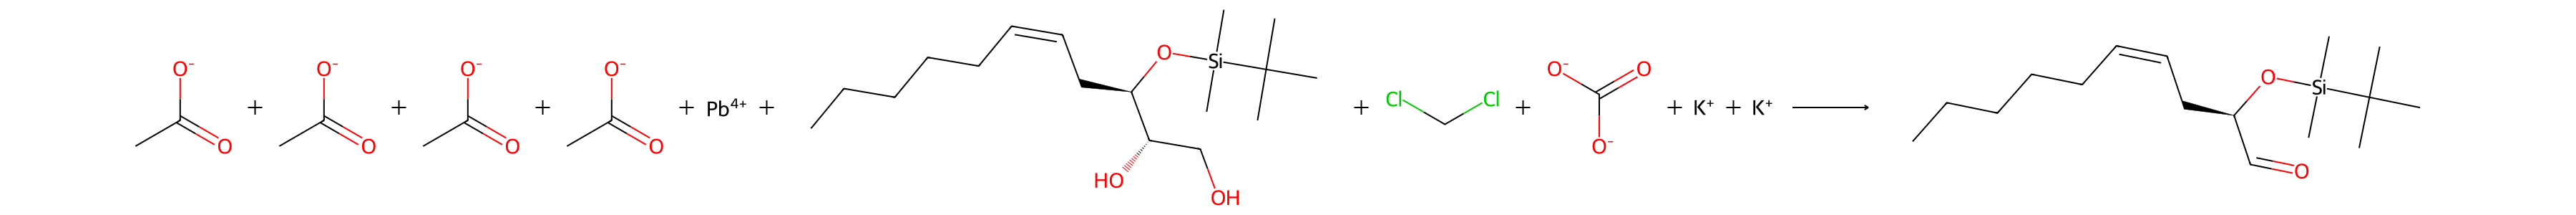

Original: O-C-[C@@H;D3;+0:1]-[OH;D1;+0:2]>>[CH;D2;+0:1]=[O;H0;D1;+0:2]
Modified: O-C-[C:1]-[O:2]>>[C:1]=[O:2]
CC(=O)[O-].CC(=O)[O-].CC(=O)[O-].CC(=O)[O-].OC[C@@H:10]([C@@H:9]([CH2:8]/[CH:7]=[CH:6]\[CH2:5][CH2:4][CH2:3][CH2:2][CH3:1])[O:12][Si:13]([CH3:14])([CH3:15])[C:16]([CH3:17])([CH3:18])[CH3:19])[OH:11].ClCCl.O=C([O-])[O-].[K+].[K+].[Pb+4]>>[CH3:1][CH2:2][CH2:3][CH2:4][CH2:5]/[CH:6]=[CH:7]\[CH2:8][C@H:9]([CH:10]=[O:11])[O:12][Si:13]([CH3:14])([CH3:15])[C:16]([CH3:17])([CH3:18])[CH3:19]


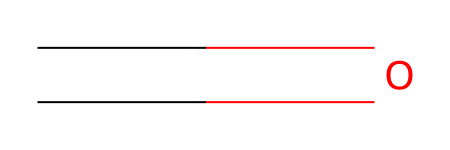

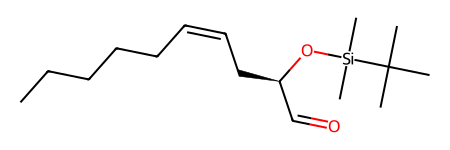

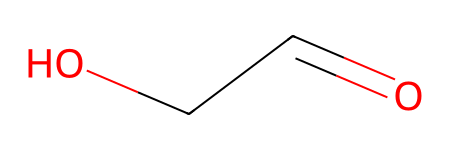

C1=C\c2cccc(c2)OCCCCCCOc2cccc/1c2.CC1CO1.Cc1ccccc1.[I]>>c1cc2c3c(c1)ccc1cccc(c13)OCCCCCCO2


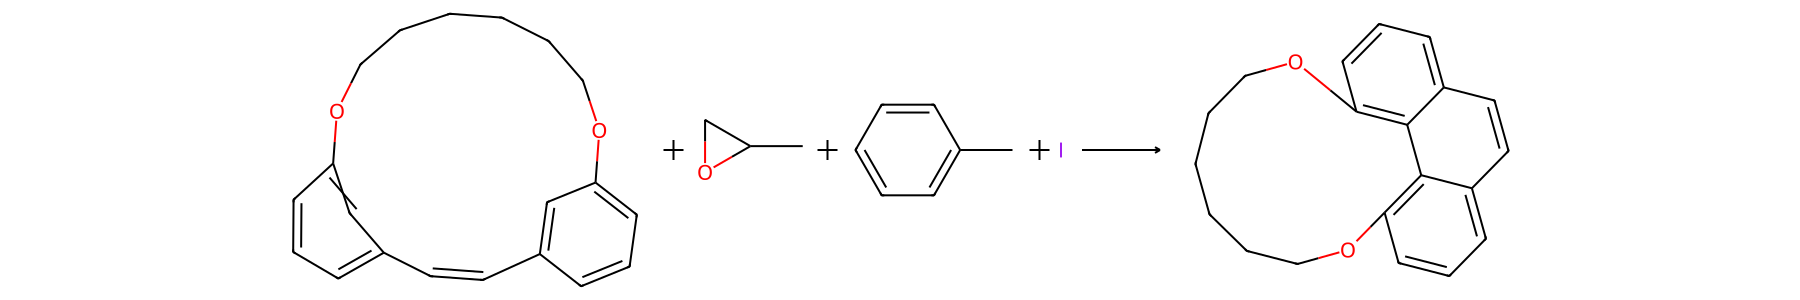

Original: [c;H0;D3;+0:1]:[cH;D2;+0:2]:[c;H0;D3;+0:3](:[cH;D2;+0:4])/[CH;D2;+0:5]=[CH;D2;+0:6]\[c;H0;D3;+0:7](:[cH;D2;+0:8]):[cH;D2;+0:9]>>[c;H0;D3;+0:1]:[c;H0;D3;+0:7]1:[c;H0;D3;+0:9]:[c;H0;D3;+0:2](:[cH;D2;+0:8]):[cH;D2;+0:3]:[cH;D2;+0:5]:[c;H0;D3;+0:6]:1:[cH;D2;+0:4]
Modified: [c:1]:[c:2]:[c:3](:[c:4])/[C:5]=[C:6]\[c:7](:[c:8]):[c:9]>>[c:1]:[c:7]1:[c:9]:[c:2](:[c:8]):[c:3]:[c:5]:[c:6]:1:[c:4]
[cH:1]1[cH:2][c:3]2[cH:9][c:8]([cH:6]1)/[CH:7]=[CH:5]\[c:4]1[cH:10][cH:11][cH:12][c:13]([cH:14]1)[O:15][CH2:16][CH2:17][CH2:18][CH2:19][CH2:20][CH2:21][O:22]2.CC1CO1.Cc1ccccc1.[I]>>[cH:1]1[cH:2][c:3]2[c:4]3[c:5]([cH:6]1)[cH:7][cH:8][c:9]1[cH:10][cH:11][cH:12][c:13]([c:14]31)[O:15][CH2:16][CH2:17][CH2:18][CH2:19][CH2:20][CH2:21][O:22]2


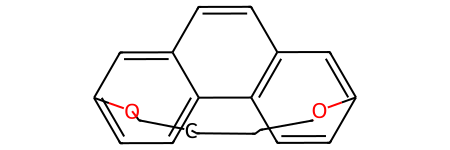

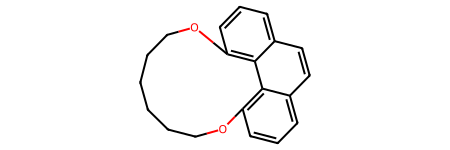

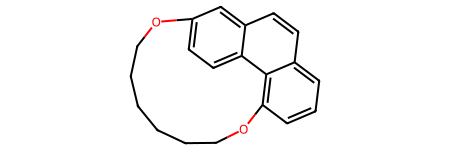

C1COCCO1.CC(=O)OC[C@H]1O[C@@H](O[C@H](CC[C@H](N)C(=O)O)CNC(=O)OCc2ccccc2)[C@H](OC(C)=O)[C@@H](OC(C)=O)[C@H]1OC(C)=O.O.O=C(OCC1c2ccccc2-c2ccccc21)ON1C(=O)CCC1=O.O=C([O-])O.[Na+]>>CC(=O)OC[C@H]1O[C@@H](O[C@H](CC[C@H](NC(=O)OCC2c3ccccc3-c3ccccc32)C(=O)O)CNC(=O)OCc2ccccc2)[C@H](OC(C)=O)[C@@H](OC(C)=O)[C@H]1OC(C)=O


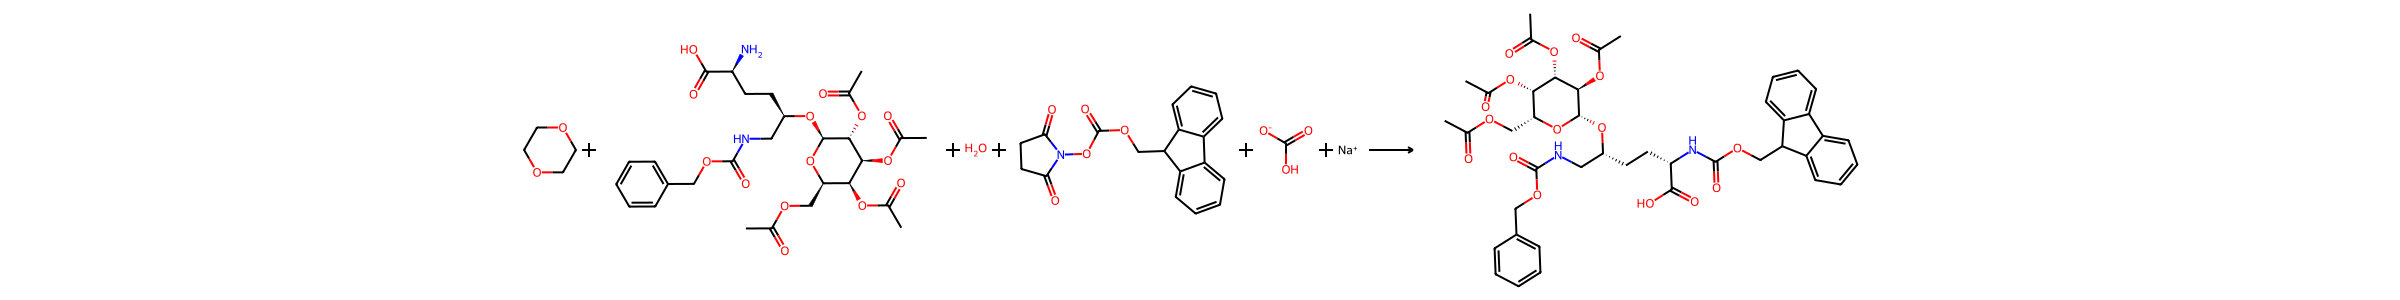

Original: O=C1-C-C-C(=O)-N-1-O-[C;H0;D3;+0:1].[NH2;D1;+0:2]>>[C;H0;D3;+0:1]-[NH;D2;+0:2]
Modified: O=C1-C-C-C(=O)-N-1-O-[C:1].[N:2]>>[C:1]-[N:2]
C1COCCO1.[CH3:1][C:2](=[O:3])[O:4][CH2:5][C@H:6]1[O:7][C@@H:8]([O:9][C@H:10]([CH2:11][CH2:12][C@H:13]([NH2:14])[C:32](=[O:33])[OH:34])[CH2:35][NH:36][C:37](=[O:38])[O:39][CH2:40][c:41]2[cH:42][cH:43][cH:44][cH:45][cH:46]2)[C@H:47]([O:48][C:49]([CH3:50])=[O:51])[C@@H:52]([O:53][C:54]([CH3:55])=[O:56])[C@H:57]1[O:58][C:59]([CH3:60])=[O:61].O.O=C1CCC(=O)N1O[C:15](=[O:16])[O:17][CH2:18][CH:19]1[c:20]2[cH:21][cH:22][cH:23][cH:24][c:25]2-[c:26]2[cH:27][cH:28][cH:29][cH:30][c:31]21.O=C([O-])O.[Na+]>>[CH3:1][C:2](=[O:3])[O:4][CH2:5][C@H:6]1[O:7][C@@H:8]([O:9][C@H:10]([CH2:11][CH2:12][C@H:13]([NH:14][C:15](=[O:16])[O:17][CH2:18][CH:19]2[c:20]3[cH:21][cH:22][cH:23][cH:24][c:25]3-[c:26]3[cH:27][cH:28][cH:29][cH:30][c:31]32)[C:32](=[O:33])[OH:34])[CH2:35][NH:36][C:37](=[O:38])[O:39][CH2:40][c:41]2[cH:42][cH:43][cH:44][cH:45][cH:46]2)[C@H:47]([O:48][C:49](

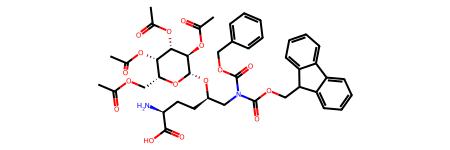

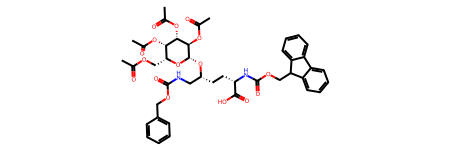

CCC[C@H](C#C[Si](C)(C)C)N(Cc1ccccc1)Cc1ccccc1.CO.[K+].[OH-]>>C#C[C@@H](CCC)N(Cc1ccccc1)Cc1ccccc1


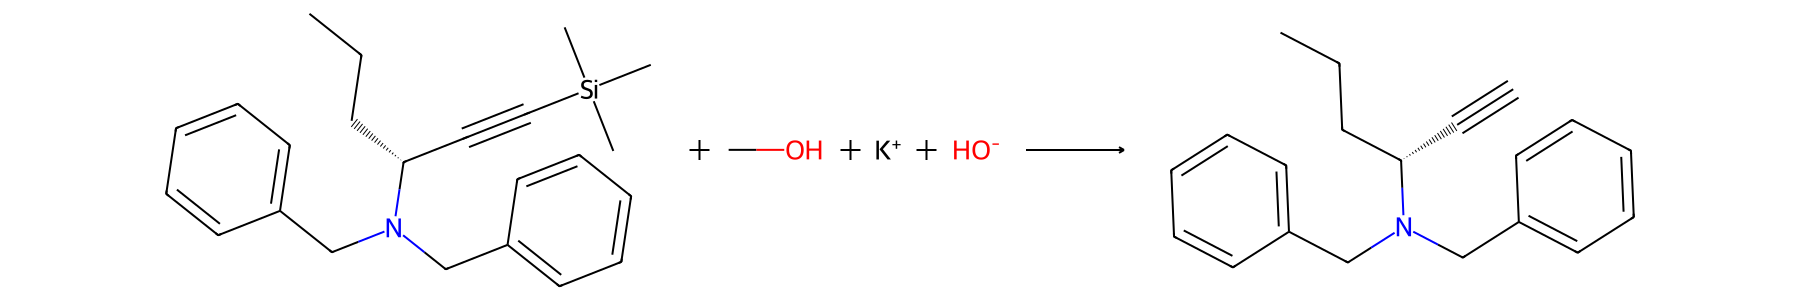

Original: C-[Si](-C)(-C)-[C;H0;D2;+0:1]>>[CH;D1;+0:1]
Modified: C-[Si](-C)(-C)-[C:1]>>[C:1]
C[Si](C)(C)[C:1]#[C:2][C@@H:3]([CH2:4][CH2:5][CH3:6])[N:7]([CH2:8][c:9]1[cH:10][cH:11][cH:12][cH:13][cH:14]1)[CH2:15][c:16]1[cH:17][cH:18][cH:19][cH:20][cH:21]1.CO.[K+].[OH-]>>[CH:1]#[C:2][C@@H:3]([CH2:4][CH2:5][CH3:6])[N:7]([CH2:8][c:9]1[cH:10][cH:11][cH:12][cH:13][cH:14]1)[CH2:15][c:16]1[cH:17][cH:18][cH:19][cH:20][cH:21]1


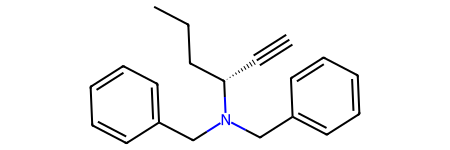

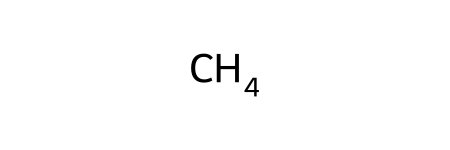

C#CCC(C(=O)OC)C(=O)OC.C=CCN([C@@H]1C=C[C@H](OC(=O)OC)C1)S(=O)(=O)c1ccc(C)cc1.[H-].[Na+].[Pd].c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1>>C#CCC(C(=O)OC)(C(=O)OC)[C@@H]1C=C[C@H](N(CC=C)S(=O)(=O)c2ccc(C)cc2)C1


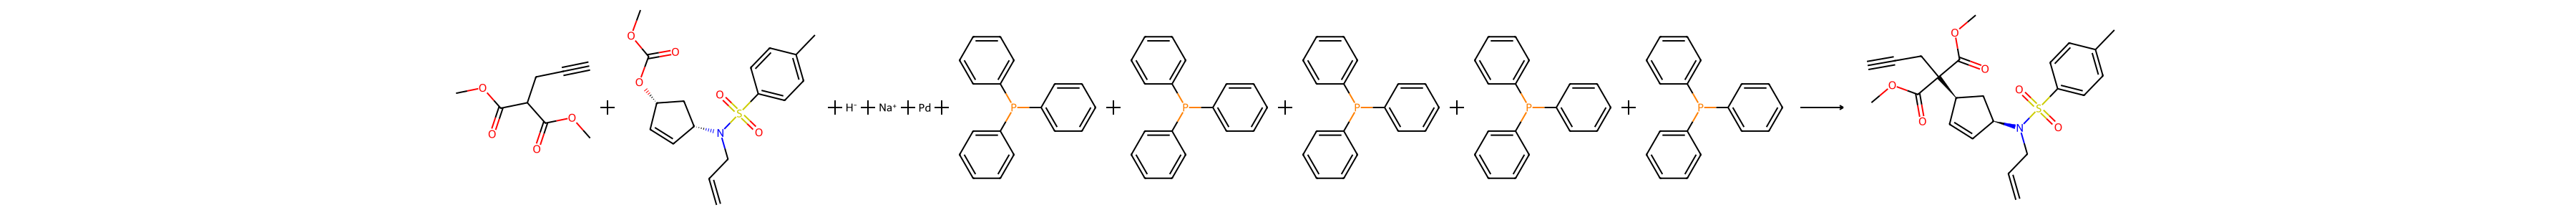

Original: C-O-C(=O)-O-[C@@H;D3;+0:1].[CH;D3;+0:2]>>[C;H0;D4;+0:2]-[C@H;D3;+0:1]
Modified: C-O-C(=O)-O-[C:1].[C:2]>>[C:2]-[C:1]
[CH:1]#[C:2][CH2:3][CH:4]([C:5](=[O:6])[O:7][CH3:8])[C:9](=[O:10])[O:11][CH3:12].COC(=O)O[C@H:13]1[CH:14]=[CH:15][C@@H:16]([N:17]([CH2:18][CH:19]=[CH2:20])[S:21](=[O:22])(=[O:23])[c:24]2[cH:25][cH:26][c:27]([CH3:28])[cH:29][cH:30]2)[CH2:31]1.[H-].[Na+].[Pd].c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1>>[CH:1]#[C:2][CH2:3][C:4]([C:5](=[O:6])[O:7][CH3:8])([C:9](=[O:10])[O:11][CH3:12])[C@@H:13]1[CH:14]=[CH:15][C@H:16]([N:17]([CH2:18][CH:19]=[CH2:20])[S:21](=[O:22])(=[O:23])[c:24]2[cH:25][cH:26][c:27]([CH3:28])[cH:29][cH:30]2)[CH2:31]1


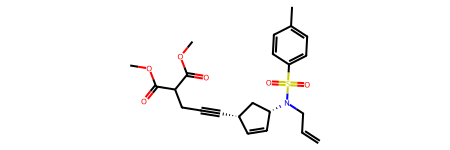

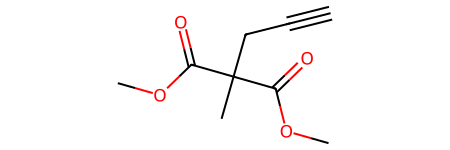

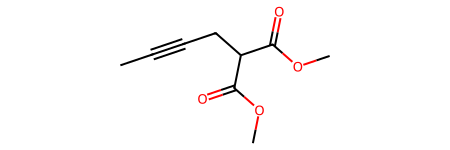

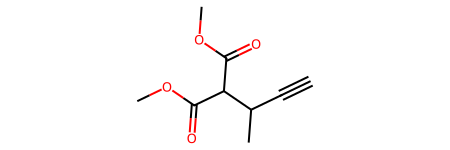

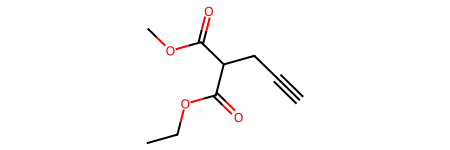

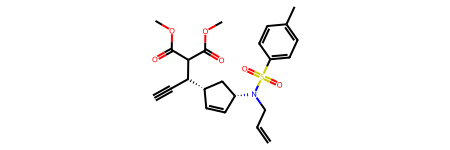

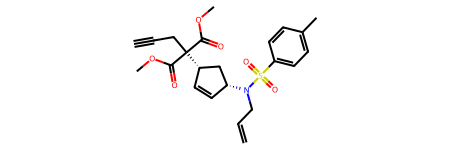

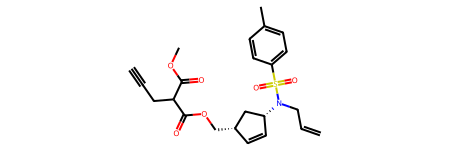

CCN(CC)CC.CO.COC1=C(C)C(=O)C2=C(C1=O)[C@H](COC(N)=O)[C@]1(OC)[C@@H]3N[C@@H]3CN21.OC1CCCNC1>>CO[C@@]12[C@@H]3N[C@@H]3CN1C1=C(C(=O)C(N3CCCC(O)C3)=C(C)C1=O)[C@@H]2COC(N)=O


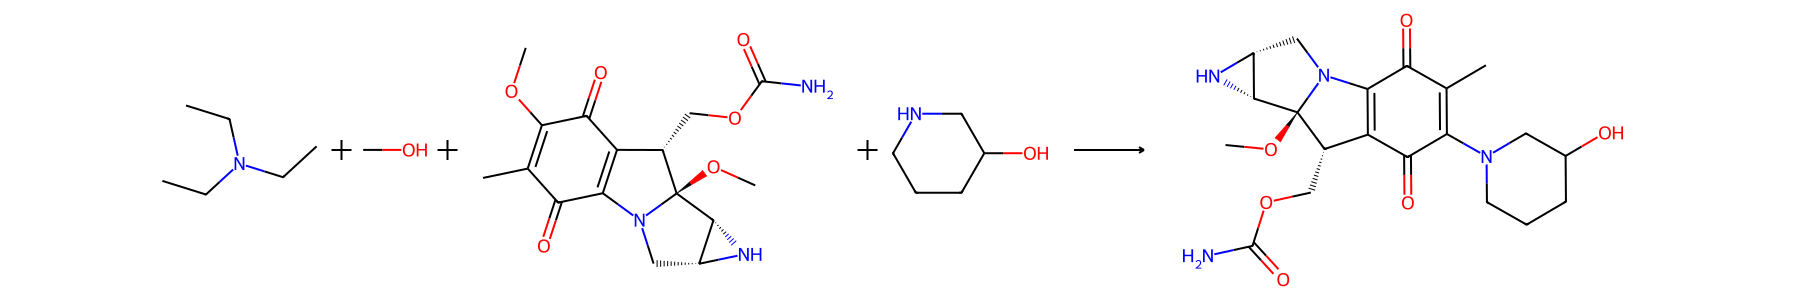

Original: C-O-[C;H0;D3;+0:1].[NH;D2;+0:2]>>[C;H0;D3;+0:1]-[N;H0;D3;+0:2]
Modified: C-O-[C:1].[N:2]>>[C:1]-[N:2]
CCN(CC)CC.CO.CO[C:13]1=[C:21]([CH3:22])[C:23](=[O:24])[C:9]2=[C:10]([C:11]1=[O:12])[C@H:25]([CH2:26][O:27][C:28]([NH2:29])=[O:30])[C@:3]1([O:2][CH3:1])[C@@H:4]3[NH:5][C@@H:6]3[CH2:7][N:8]12.[NH:14]1[CH2:15][CH2:16][CH2:17][CH:18]([OH:19])[CH2:20]1>>[CH3:1][O:2][C@@:3]12[C@@H:4]3[NH:5][C@@H:6]3[CH2:7][N:8]1[C:9]1=[C:10]([C:11](=[O:12])[C:13]([N:14]3[CH2:15][CH2:16][CH2:17][CH:18]([OH:19])[CH2:20]3)=[C:21]([CH3:22])[C:23]1=[O:24])[C@@H:25]2[CH2:26][O:27][C:28]([NH2:29])=[O:30]


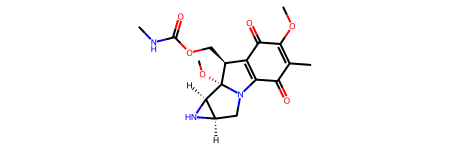

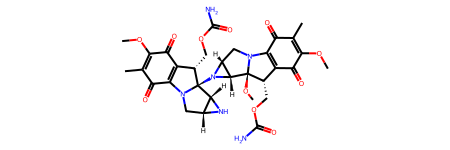

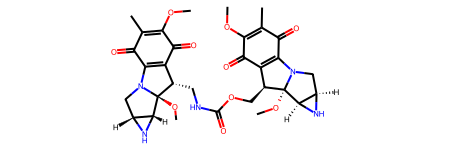

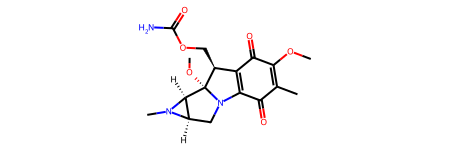

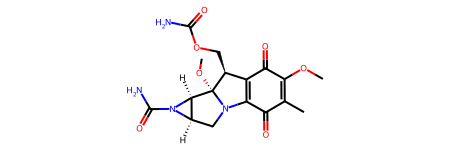

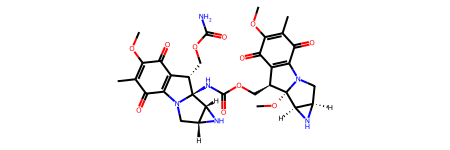

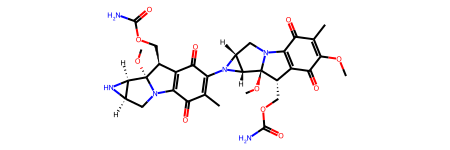

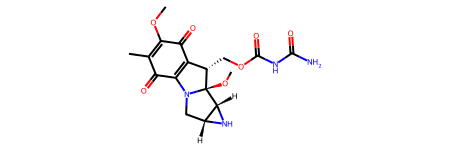

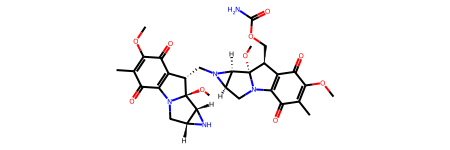

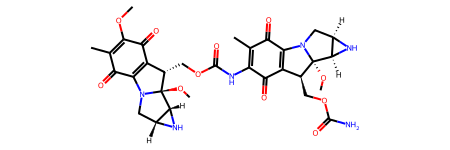

In [12]:
for i, row in flagged.iterrows():
    print(row['rxn'])
    visualize_reaction(row['rxn'], row['template'], row['general_SMARTS'])
    print(row['mapped'])
    products = generate_products(row['rxn'], row['template'], row['general_SMARTS'])
    for i in products:
        display(Chem.MolFromSmiles(i))

We use a slight modification of the reaction that takes the mapped reaction as an extra input

In [12]:
def flag_regio_problem(rxn, mapping):
    '''Flag regioselectivity problems. For the moment only one-product
    reactions. The function extracts the reaction template (only reacting atoms) and then checks
    if the matching atoms in the product can generate several products.
    
    Args:
        rxn: str, reaction SMILES
        mapping: str, reaction mapped SMILES
    
    Out:
        bool, True if the reaction is regioselective, False otherwise

    '''

    def _sanitize_filter_prods(prods):
        good = []
        for prod in prods:
            try: 
                x = Chem.SanitizeMol(prod[0])
                good.append(Chem.MolToSmiles(prod[0]))
            except:
                pass
        return set(good)

    temp = template_smarts_from_mapped_smiles(mapping)
    
    #extract reagents templates
    #compare rxn and rxn_smiles and get the elements that are different from each element separated by .
    rxn_list = rxn.split('>>')[0].split('.')
    map_list = mapping.split('>>')[0].split('.')

    #template needs to be modified to a more specific case to capture different possibilities
    regex = r'(\[[A-Za-z][a-z]?)([^>(\])]+?)(:[0-9]\])'
    general_template = re.sub(regex, r'\1\3', temp)

    #compare lists and extract only the elements from rxn_list that are different from rxn_smiles_list
    reactants = [i for i in rxn_list if i not in map_list]

    #check if reactants generate several products
    reaction = AllChem.ReactionFromSmarts(general_template)
    reaction.Initialize()

    try:
        if len(reactants) == 2:

            r1 = Chem.MolFromSmiles(reactants[0])
            r2 = Chem.MolFromSmiles(reactants[1])

            mols = [(r1, r2), (r2, r1)]
            
            for reactants in mols:
                new_products = reaction.RunReactants(reactants)
                if new_products == ():
                    pass
                else:
                    products = _sanitize_filter_prods(new_products)

        if len(reactants) == 1:
            r1 = Chem.MolFromSmiles(reactants[0])
            new_products = reaction.RunReactants((r1,))
            products = _sanitize_filter_prods(new_products)

    
        if len(products) == 1:
            return False
        elif len(products) > 1:
            return True
        else:
            return False
    
    except:
        return False
        

In [29]:
#apply flag_regio_problem to choriso using 'rxn' and 'mapped' columns as input for the function
choriso['regioselective'] = choriso.apply(lambda x: flag_regio_problem(x['rxn'], x['mapped']), axis=1)

In [30]:
choriso[choriso['regioselective'] == True]['rxn'].values

array([], dtype=object)

### Mapped reactions

In [28]:
smi = 'F-C(-F)(-F)-S(=O)(=O)-O-[c:1].O-B(-O)-[c:2]>>[c:1]-[c:2]'

rxn_smi = 'CN(C)C=O.COc1ccc2cc(OS(=O)(=O)C(F)(F)F)c(Cc3ccccc3)cc2c1.O.O=C([O-])O.[Na+].OB(O)c1cccnc1.[Pd].c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1>>COc1ccc2cc(-c3cccnc3)c(Cc3ccccc3)cc2c1'

temp = AllChem.ReactionFromSmarts(smi)

rxn = AllChem.ReactionFromSmarts(rxn_smi)

rxn_list = rxn_smi.split('>>')[0].split('.')
map_list = smi.split('>>')[0].split('.')

reactants = ['COc1ccc2cc(OS(=O)(=O)C(F)(F)F)c(Cc3ccccc3)cc2c1', 'OB(O)c1cccnc1']

reactants = [Chem.MolFromSmiles(x) for x in reactants]

prods = temp.RunReactants(reactants)

sanitize_filter_prods(prods)

{'COc1ccc2cc(-c3cccnc3)c(Cc3ccccc3)cc2c1'}

In [26]:
rxn_smi = 'C=CC[C@@H](OCc1ccc(OC)cc1)[C@](C)(CCO[Si](C(C)C)(C(C)C)C(C)C)O[C@@H](CO)COCc1ccccc1.CCN(CC)CC.CS(C)=O.ClCCl.O=C(Cl)C(=O)Cl>>C=CC[C@@H](OCc1ccc(OC)cc1)[C@](C)(CCO[Si](C(C)C)(C(C)C)C(C)C)O[C@@H](C=O)COCc1ccccc1'
smarts = '[C:1]-[O:2]>>[C:1]=[O:2]'

rxn = AllChem.ReactionFromSmarts(rxn_smi)

temp = AllChem.ReactionFromSmarts(smarts)

react = (Chem.MolFromSmiles('C=CC[C@H]([C@](CCO[Si](C(C)C)(C(C)C)C(C)C)(O[C@H](COCc1ccccc1)CO)C)OCc2ccc(OC)cc2'),)

prods = temp.RunReactants(react)

def sanitize_filter_prods(prods):
    good = []
    for prod in prods:
        try: 
            x = Chem.SanitizeMol(prod[0])
            good.append(Chem.MolToSmiles(prod[0]))
        except:
            pass
    return set(good)


## STEREOCHEMISTRY

Get template of the reaction center and the stereochemistry of matching reacting atoms

In [8]:
#an example from the fake reactions
t = '[C;H0;D3;+0:1]=[CH;D2;+0:2].[SH;D1;+0:3]>>[CH2;D2;+0:2]-[C@;H0;D4;+0:1]-[S;H0;D2;+0:3]'

In [29]:
t.split('>>')[1].split('.')

['[CH2;D2;+0:2]-[C@;H0;D4;+0:1]-[S;H0;D2;+0:3]']

We could consider two general cases for these reactions:
1) A new stereocenter is created in the product (no stereochemistry in the reactant)
2) A stereocenter is modified in the product (stereochemistry in the reactant, e.g SN2)

Our function will take the rxn SMILES and the extracted template, extract reactants and products, and check for the stereocenters.

In [34]:
def select_reagents(rxn, map):
    '''Select reagents from a reaction based on the mapped atoms
    
    Args:
        rxn (str): reaction SMILES
        map (str): mapped reaction extracted with rxnmapper
    
    Returns:
        r1 (str): first reagent SMILES
        r2 (str): second reagent SMILES 
        
    '''
    reaction = AllChem.ReactionFromSmarts(map)
    mols = [Chem.MolFromSmiles(smi) for smi in rxn.split('>>')[0].split('.')]
    reactant_templates = reaction.GetReactants()

    if len(reactant_templates) == 2:
        #check which species from mols match each reactant template
        reactant_matches = [mol.HasSubstructMatch(reactant_templates[0]) for mol in mols]
        reactant_matches2 = [mol.HasSubstructMatch(reactant_templates[1]) for mol in mols]
        #select True index in reactant_matches and reactant_matches2
        reactant_matches_index = reactant_matches.index(True)
        reactant_matches2_index = reactant_matches2.index(True)
        #select the correct order
        r1 = mols[reactant_matches_index]
        r2 = mols[reactant_matches2_index]

        return r1, r2

    if len(reactant_templates) == 1:
        reactant_matches = [mol.HasSubstructMatch(reactant_templates[0]) for mol in mols]
        reactant_matches_index = reactant_matches.index(True)
        r1 = mols[reactant_matches_index]
        return r1,

def select_products(rxn, map):
    reaction = AllChem.ReactionFromSmarts(map)
    mols = np.array([Chem.MolFromSmiles(smi) for smi in rxn.split('>>')[1].split('.')])
    product_templates = reaction.GetProducts()

    if len(product_templates) == 2:
        pass
    #check which species from mols match each reactant template

def flag_stereo(rxn, temp):

    #prods = [Chem.MolFromSmiles(smi) for smi in rxn.split('>>')[1].split('.')]

    try:
        temp_prods = temp.split('>>')[1].split('.')
        #check if any of the strings in prods contain '@'
        if any('@' in prod for prod in temp_prods):
            return True
    except:
        return False

    

In [40]:
choriso_stereo = pd.read_csv('../../../data/processed_choriso_preds_mapped_stereo.tsv', sep='\t')

flags = choriso_stereo[choriso_stereo['stereo'] == True]

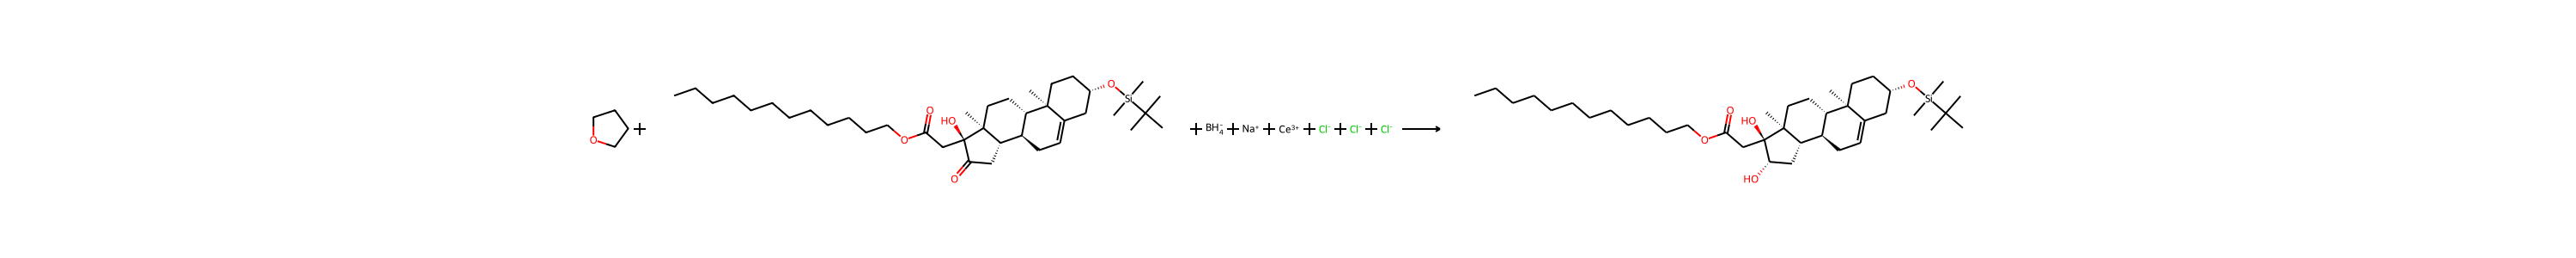

Original: C1CCOC1.CCCCCCCCCCCCOC(=O)C[C@@]1(O)C(=O)C[C@H]2[C@@H]3CC=C4C[C@@H](O[Si](C)(C)C(C)(C)C)CC[C@]4(C)[C@H]3CC[C@@]21C.[BH4-].[Na+].[Ce+3].[Cl-].[Cl-].[Cl-]>>CCCCCCCCCCCCOC(=O)C[C@@]1(O)[C@@H](O)C[C@H]2[C@@H]3CC=C4C[C@@H](O[Si](C)(C)C(C)(C)C)CC[C@]4(C)[C@H]3CC[C@@]21C
Modified: C1CCOC1.CCCCCCCCCCCCOC(=O)C[C@@]1(O)C(=O)C[C@H]2[C@@H]3CC=C4C[C@@H](O[Si](C)(C)C(C)(C)C)CC[C@]4(C)[C@H]3CC[C@@]21C.[BH4-].[Na+].[Ce+3].[Cl-].[Cl-].[Cl-]>>CCCCCCCCCCCCOC(=O)C[C@@]1(O)[C@@H](O)C[C@H]2[C@@H]3CC=C4C[C@@H](O[Si](C)(C)C(C)(C)C)CC[C@]4(C)[C@H]3CC[C@@]21C


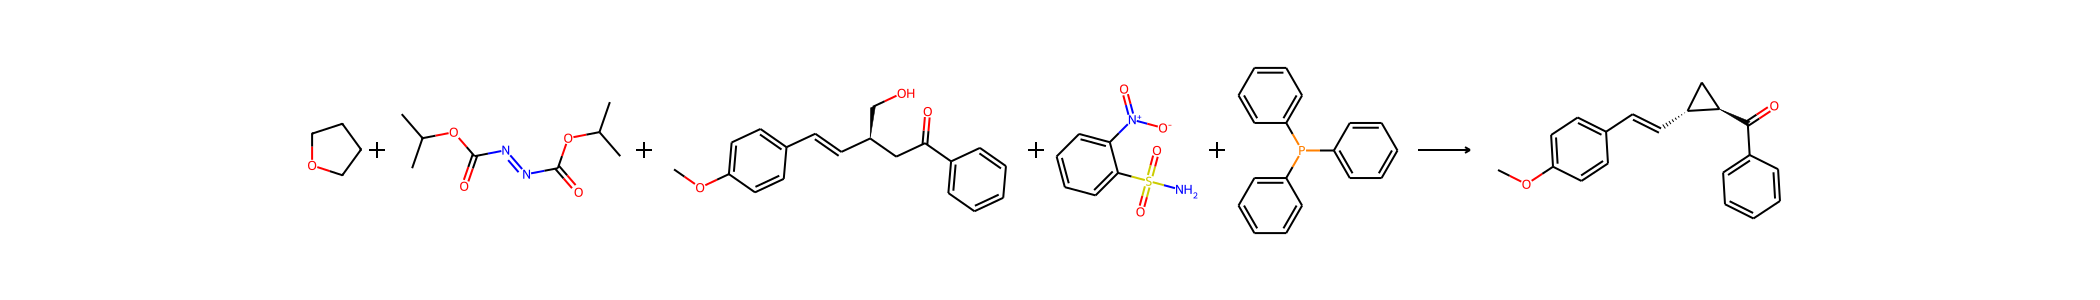

Original: C1CCOC1.CC(C)OC(=O)N=NC(=O)OC(C)C.COc1ccc(/C=C/[C@@H](CO)CC(=O)c2ccccc2)cc1.NS(=O)(=O)c1ccccc1[N+](=O)[O-].c1ccc(P(c2ccccc2)c2ccccc2)cc1>>COc1ccc(/C=C/[C@@H]2C[C@H]2C(=O)c2ccccc2)cc1
Modified: C1CCOC1.CC(C)OC(=O)N=NC(=O)OC(C)C.COc1ccc(/C=C/[C@@H](CO)CC(=O)c2ccccc2)cc1.NS(=O)(=O)c1ccccc1[N+](=O)[O-].c1ccc(P(c2ccccc2)c2ccccc2)cc1>>COc1ccc(/C=C/[C@@H]2C[C@H]2C(=O)c2ccccc2)cc1


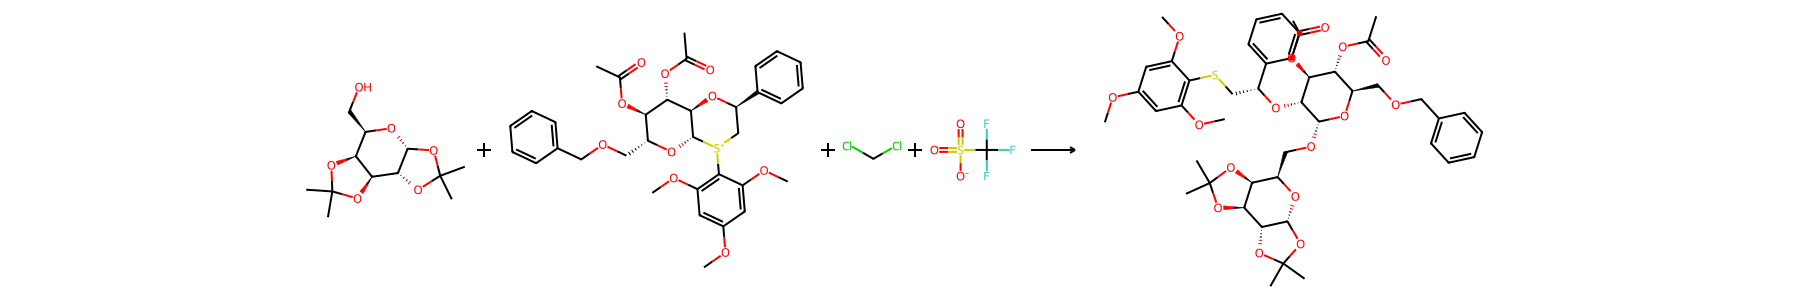

Original: CC1(C)O[C@H]2[C@@H](O1)[C@@H](CO)O[C@@H]1OC(C)(C)O[C@@H]12.COc1cc(OC)c([S+]2C[C@H](c3ccccc3)O[C@@H]3[C@@H](OC(C)=O)[C@H](OC(C)=O)[C@@H](COCc4ccccc4)O[C@H]32)c(OC)c1.ClCCl.O=S(=O)([O-])C(F)(F)F>>COc1cc(OC)c(SC[C@@H](O[C@H]2[C@@H](OC[C@H]3O[C@@H]4OC(C)(C)O[C@@H]4[C@H]4OC(C)(C)O[C@H]43)O[C@H](COCc3ccccc3)[C@@H](OC(C)=O)[C@@H]2OC(C)=O)c2ccccc2)c(OC)c1
Modified: CC1(C)O[C@H]2[C@@H](O1)[C@@H](CO)O[C@@H]1OC(C)(C)O[C@@H]12.COc1cc(OC)c([S+]2C[C@H](c3ccccc3)O[C@@H]3[C@@H](OC(C)=O)[C@H](OC(C)=O)[C@@H](COCc4ccccc4)O[C@H]32)c(OC)c1.ClCCl.O=S(=O)([O-])C(F)(F)F>>COc1cc(OC)c(SC[C@@H](O[C@H]2[C@@H](OC[C@H]3O[C@@H]4OC(C)(C)O[C@@H]4[C@H]4OC(C)(C)O[C@H]43)O[C@H](COCc3ccccc3)[C@@H](OC(C)=O)[C@@H]2OC(C)=O)c2ccccc2)c(OC)c1


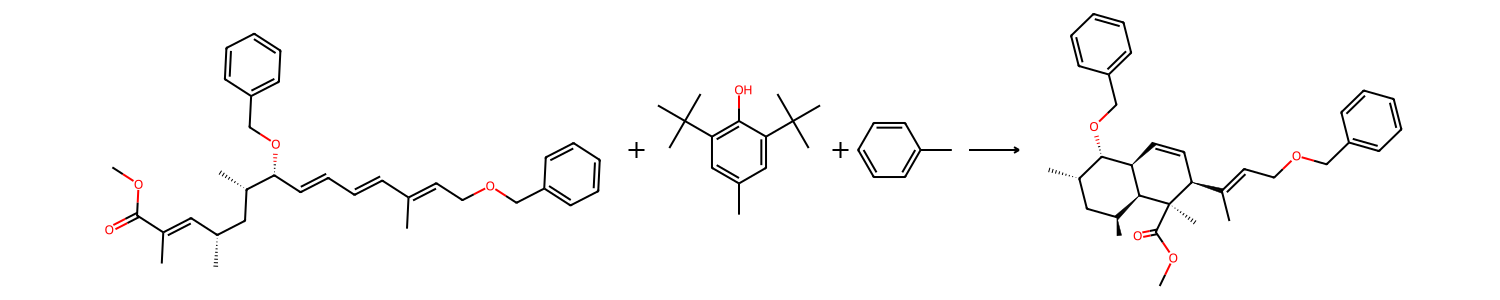

Original: COC(=O)/C(C)=C/[C@@H](C)C[C@H](C)[C@@H](/C=C/C=C/C(C)=C/COCc1ccccc1)OCc1ccccc1.Cc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1.Cc1ccccc1>>COC(=O)[C@@]1(C)[C@@H]2[C@H](C=C[C@H]1/C(C)=C/COCc1ccccc1)[C@@H](OCc1ccccc1)[C@@H](C)C[C@@H]2C
Modified: COC(=O)/C(C)=C/[C@@H](C)C[C@H](C)[C@@H](/C=C/C=C/C(C)=C/COCc1ccccc1)OCc1ccccc1.Cc1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1.Cc1ccccc1>>COC(=O)[C@@]1(C)[C@@H]2[C@H](C=C[C@H]1/C(C)=C/COCc1ccccc1)[C@@H](OCc1ccccc1)[C@@H](C)C[C@@H]2C


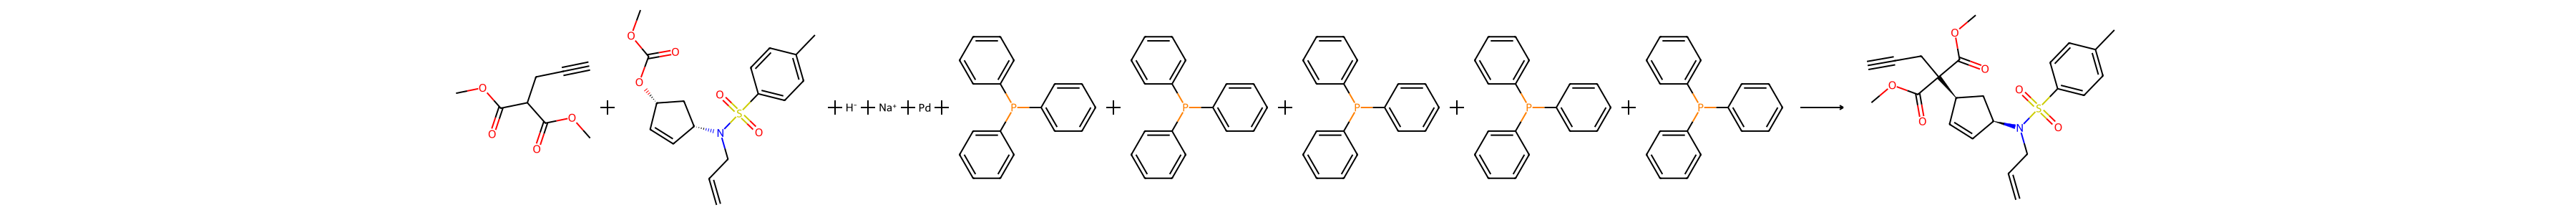

Original: C#CCC(C(=O)OC)C(=O)OC.C=CCN([C@@H]1C=C[C@H](OC(=O)OC)C1)S(=O)(=O)c1ccc(C)cc1.[H-].[Na+].[Pd].c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1>>C#CCC(C(=O)OC)(C(=O)OC)[C@@H]1C=C[C@H](N(CC=C)S(=O)(=O)c2ccc(C)cc2)C1
Modified: C#CCC(C(=O)OC)C(=O)OC.C=CCN([C@@H]1C=C[C@H](OC(=O)OC)C1)S(=O)(=O)c1ccc(C)cc1.[H-].[Na+].[Pd].c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1.c1ccc(P(c2ccccc2)c2ccccc2)cc1>>C#CCC(C(=O)OC)(C(=O)OC)[C@@H]1C=C[C@H](N(CC=C)S(=O)(=O)c2ccc(C)cc2)C1


In [41]:
for i, f in flags.iterrows():
    visualize_reaction(f['rxn'], f['rxn'], f['rxn'])

In [20]:
idxs = product.GetSubstructMatch(smarts)

def get_substructure_bonds(atom_indices, mol):
    """Get all the existing bonds between atoms in a molecule substructure."""
    substructure_atoms = [mol.GetAtomWithIdx(i) for i in atom_indices]
    substructure_bonds = []
    for atom in substructure_atoms:
        for neighbor in atom.GetNeighbors():
            if neighbor.GetIdx() in atom_indices:
                bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                if bond is not None:
                    substructure_bonds.append(bond)
    return substructure_bonds

get_substructure_bonds(idxs, product)

[]

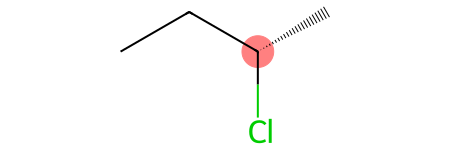

In [24]:
product

In [23]:
#get the stereochemistry of the atom in the product
product.GetAtomWithIdx(idxs[0]).GetChiralTag()

#get absolute stereochemistry of the atom in the product
product.GetAtomWithIdx(idxs[0]).GetProp('_CIPCode')

'S'

In [98]:
res = [(a, b) for idx, a in enumerate(idxs) for b in idxs[idx + 1:]]

for i in res:
    x, y = i
    bond = product.GetBondBetweenAtoms(x, y)
    if bond:
        print(bond.GetStereo())

STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE
STEREONONE


In [ ]:
def get_substructure_bonds(atom_indices, mol):
    """Get all the existing bonds between atoms in a molecule substructure."""
    substructure_atoms = [mol.GetAtomWithIdx(i) for i in atom_indices]
    substructure_bonds = set()
    for atom in substructure_atoms:
        for neighbor in atom.GetNeighbors():
            if neighbor.GetIdx() in atom_indices:
                bond = mol.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
                if bond is not None:
                    substructure_bonds.add(bond)
    return list(substructure_bonds)

get_substructure_bonds(idxs, product)

In [83]:
from rdkit import Chem
from rdkit.Chem import AllChem

def identify_potential_stereocenters(mol, smarts):
    """
    Identify potential stereocenters in a molecule based on a SMARTS pattern.

    Args:
        mol (rdkit.Chem.rdchem.Mol): A molecule object.
        smarts (str): A SMARTS pattern.

    Returns:
        A list of atom indices that are potential stereocenters.
    """
    # Create a query molecule from the SMARTS pattern
    query = Chem.MolFromSmarts(smarts)
    # Use the query to find matching atoms in the molecule
    matches = mol.GetSubstructMatches(query)
    # Get the atom indices of the matching atoms
    matching_atoms = set([atom_idx for match in matches for atom_idx in match])

    # Identify potential stereocenters based on the matching atoms
    potential_stereocenters = []

    for atom_idx in matching_atoms:
        atom = mol.GetAtomWithIdx(atom_idx)
        # Check if the atom is chiral
        if atom.GetChiralTag() != Chem.ChiralType.CHI_UNSPECIFIED:
            potential_stereocenters.append(atom_idx)
        # Check if the atom is part of a double bond that generates stereochemistry
        elif atom.GetDegree() == 2:
            neighbor1 = atom.GetNeighbors()[0]
            neighbor2 = atom.GetNeighbors()[1]
            bond = mol.GetBondBetweenAtoms(neighbor1.GetIdx(), atom.GetIdx())
            if bond.GetBondType() == Chem.BondType.DOUBLE and bond.GetStereo() != Chem.BondStereo.STEREONONE:
                potential_stereocenters.append(atom_idx)

    return potential_stereocenters


In [84]:
identify_potential_stereocenters(product, temp)

[]

In [40]:
rxn.Initialize()

r1 = Chem.MolFromSmiles('C/C(C)=C/C=C')
r2 = Chem.MolFromSmiles('Br')
rxn.RunReactants((r2,r1))

((<rdkit.Chem.rdchem.Mol at 0x7f617c054040>,),)

In [3]:
from rdkit import Chem

# Define the molecule SMILES
mol_smiles = "CC(C)C[C@@H](C)[C@@H](C)C(=O)O"

prod_smiles = 'CC(C[C@H]([C@@H](C(O)=O)C)C)C'

# Load the molecule
mol = Chem.MolFromSmiles(prod_smiles)

def extract_configs(mol):
    # Get the atoms in the molecule that have stereochemistry
    stereo_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.HasProp("_CIPCode")]

    # Get the configuration of each stereocenter
    configurations = [mol.GetAtomWithIdx(atom_idx).GetProp("_CIPCode") for atom_idx in stereo_atoms]

    return configurations

extract_configs(mol)

['R', 'S']

In [ ]:
from rdkit import Chem

# Define the SMARTS pattern
smarts_pattern = '[C;X4][C;X4](C)(C)'

# Load the molecule
mol = Chem.MolFromSmiles('C/C=C/[C@H]([C@H](C(O)=O)C)C')

# Find the indices of the atoms matching the SMARTS pattern
matching_atoms = mol.GetSubstructMatches(Chem.MolFromSmarts(smarts_pattern))

# Check if any of the matching atoms are potential stereocenters
for atom_idx in mol.GetAtoms():
    if mol.GetAtomWithIdx(atom_idx).GetChiralTag() != Chem.ChiralType.CHI_UNSPECIFIED:
        print(f"Atom {atom_idx} is a potential stereocenter.")


In [42]:
from rdkit.Chem.rdMolDescriptors import CalcNumAtomStereoCenters

molecule = Chem.MolFromSmiles('C/C=C/[C@H]([C@H](C(O)=O)C)C')

print(CalcNumAtomStereoCenters(molecule))
for i in molecule.GetAtoms():
    if i.GetChiralTag() != Chem.ChiralType.CHI_UNSPECIFIED:
        print(f"Atom {i.GetIdx()} is a potential stereocenter.")


2
Atom 3 is a potential stereocenter.
Atom 4 is a potential stereocenter.


In [59]:
from rdkit.Chem.rdmolops import FindPotentialStereo

molecule = Chem.MolFromSmiles('CCCCC')
o = FindPotentialStereo(molecule)


In [62]:
list(o)

[]

In [61]:
for i in list(o):
    print(i.descriptor)

In [7]:
from rdkit.Chem.rdMolDescriptors import CalcNumAtomStereoCenters

In [8]:
CalcNumAtomStereoCenters(mol)

2